# 기본코드

In [ ]:
#	"as	name"	indicates	the	name	we	will	use	to	refer	to	this	library
import	warnings
import	numpy	as	np
import	pandas	as	pd
import	matplotlib.pyplot	as	plt
#	we	will	only	import	certain	module	from	those	libraries
from	mpl_toolkits.mplot3d	import	Axes3D
from	sklearn.decomposition	import	PCA
#from	sklearn.preprocessing	import	StandardScaler
from	sklearn.preprocessing	import	MinMaxScaler
from	sklearn.covariance	import	EllipticEnvelope
from	sklearn.ensemble	import	IsolationForest
from	random	import	randrange
from	datetime	import	datetime
import	math
import	plotly.graph_objects	as	go
import	plotly.express	as	px
from	plotly.subplots	import	make_subplots
warnings.simplefilter(action='ignore',	category=FutureWarning)

In [ ]:
# you will be prompted with a window asking to grant permissions
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# 디렉토리 이동
%cd /content/drive/MyDrive/숭실대학교\ 4학년/지능시스템/Dataset_전자부품\(배터리팩\)\ 품질보증\ AI\ 데이터셋

# 이후엔 상대경로만 사용 가능
data = pd.read_csv('data/raw_data/train/1002_chg.csv')


/content/drive/MyDrive/숭실대학교 4학년/지능시스템/Dataset_전자부품(배터리팩) 품질보증 AI 데이터셋


In [ ]:
 #	Showing	the	first	five	rows	of	our	data
data.head()

,Date,Time,SerialNumber,Voltage,Current,RSOCmin,RSOCmax,RSOCavg,USOCmin,USOCmax,...,M12T01,M12T02,M13T01,M13T02,M14T01,M14T02,M15T01,M15T02,M16T01,M16T02
0,2020-08-06,15:51:48,1002,641.9,0.0,34.34,35.23,34.87,35,36,...,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3,32.4
1,2020-08-06,15:51:49,1002,641.9,0.0,34.34,35.23,34.87,35,36,...,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3,32.4
2,2020-08-06,15:51:50,1002,641.9,0.0,34.34,35.23,34.87,35,36,...,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3,32.4
3,2020-08-06,15:51:51,1002,641.9,0.0,34.34,35.23,34.87,35,36,...,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3,32.4
4,2020-08-06,15:51:52,1002,641.9,0.0,34.34,35.23,34.87,35,36,...,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3,32.4


In [ ]:
#	There	are	231	columns,	and	some	of	the	names	are	shown	in	below.
data.columns

Index(['Date', 'Time', 'SerialNumber', 'Voltage', 'Current', 'RSOCmin',
       'RSOCmax', 'RSOCavg', 'USOCmin', 'USOCmax',
       ...
       'M12T01', 'M12T02', 'M13T01', 'M13T02', 'M14T01', 'M14T02', 'M15T01',
       'M15T02', 'M16T01', 'M16T02'],
      dtype='object', length=231)

In [ ]:
#	Concise	summary	of	the	dataframe.	This	method	prints	information	about	a	DataFrame
#	including	the	index	dtype	and	columns,	non-null	values	and	memory	usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6008 entries, 0 to 6007
Columns: 231 entries, Date to M16T02
dtypes: float64(219), int64(10), object(2)
memory usage: 10.6+ MB


In [ ]:
data.shape

(6008, 231)

In [ ]:
data.dtypes

,0
Date,object
Time,object
SerialNumber,int64
Voltage,float64
Current,float64
...,...
M14T02,float64
M15T01,float64
M15T02,float64
M16T01,float64


In [ ]:
data.nunique(axis	=	0)

,0
Date,1
Time,6008
SerialNumber,1
Voltage,706
Current,268
...,...
M14T02,39
M15T01,47
M15T02,46
M16T01,42


In [ ]:
data[data['Time'].isin(data['Time'][data['Time'].duplicated()])].sort_values("Time")

,Date,Time,SerialNumber,Voltage,Current,RSOCmin,RSOCmax,RSOCavg,USOCmin,USOCmax,...,M12T01,M12T02,M13T01,M13T02,M14T01,M14T02,M15T01,M15T02,M16T01,M16T02


In [ ]:
data.describe()

,SerialNumber,Voltage,Current,RSOCmin,RSOCmax,RSOCavg,USOCmin,USOCmax,USOCavg,SOH,...,M12T01,M12T02,M13T01,M13T02,M14T01,M14T02,M15T01,M15T02,M16T01,M16T02
count,6008.0,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.0,...,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000
mean,1002.0,691.571621,-34.939031,71.145623,72.035623,71.675623,77.706391,78.737517,78.443409,0.0,...,35.116744,35.162617,34.989065,35.075816,34.881358,34.571238,35.003262,35.027247,35.267277,35.114164
std,0.0,24.683574,25.217581,18.658871,18.658871,18.658871,21.819225,21.805201,21.953516,0.0,...,1.311774,1.352544,1.305439,1.353561,1.222343,1.164667,1.356203,1.341757,1.221368,1.162469
min,1002.0,641.800000,-70.300000,34.340000,35.230000,34.870000,35.000000,36.000000,35.000000,0.0,...,31.900000,31.800000,31.800000,31.800000,32.000000,31.900000,31.700000,31.800000,32.300000,32.400000
25%,1002.0,667.475000,-55.000000,54.882500,55.772500,55.412500,59.000000,60.000000,59.000000,0.0,...,34.400000,34.400000,34.300000,34.375000,34.200000,33.900000,34.300000,34.300000,34.700000,34.500000
50%,1002.0,699.150000,-53.200000,76.400000,77.290000,76.930000,84.000000,85.000000,85.000000,0.0,...,35.600000,35.700000,35.500000,35.600000,35.400000,35.000000,35.600000,35.600000,35.800000,35.600000
75%,1002.0,714.800000,0.000000,89.470000,90.360000,90.000000,99.000000,100.000000,100.000000,0.0,...,36.200000,36.300000,36.000000,36.200000,35.900000,35.500000,36.100000,36.100000,36.200000,36.000000
max,1002.0,719.000000,0.000000,89.480000,90.370000,90.010000,99.000000,100.000000,100.000000,0.0,...,36.300000,36.400000,36.200000,36.300000,36.000000,35.700000,36.300000,36.300000,36.400000,36.200000


In [ ]:
#	array_attributes	=	the	names	of	the	columns	we	would	like	the	histograms	for
 #	cols_number	=	indicate	how	many	columns	for	the	grid
def	showHistograms(data,	histogram_attributes,	cols_number,	height,	width):
  rows_number	=	math.ceil(len(histogram_attributes)	/	cols_number)
  #	rows	number	calculated	automatically
  fig	=	make_subplots(rows	=	rows_number,	cols	=	cols_number,
    subplot_titles	=	(histogram_attributes))
  for	i	in	range(len(histogram_attributes)):
    legend	=	histogram_attributes[i]	+	"	count"
    #	cols	and	rows	start	in	1,	not	in	0,	thus	we	add	one.
    row_number	=	i%cols_number	+	1
    col_number	=	math.ceil((i+1)	/	cols_number)
    fig.append_trace(go.Histogram(name	=	legend,	x	=	data[histogram_attributes[i]]),
     row_number,	col_number)
  fig.update_layout(height	=	height,	width	=	width,
    title_text	=	"Histograms	of	Selected	Attributes")
  fig.show()

In [ ]:
histogram_attributes	=	["Voltage",	"Current",	"RSOCavg",	"USOCavg",	"Power",	"M16T02",
"Vmax",	"Tavg"]
#	attributes	we	want	in	our	histogram	grid
showHistograms(data,	histogram_attributes,	3,	900,	900)

In [ ]:
#	Procedure	for	Drawing	Correlation	Heatmap	with	Coefficient	Text	Printed
#	Input	parameter:	the	dataframe	name,	the	width	for	heatmap	graph,	and	the	number	of	column
#	to	visualize.
#	Output:	correaltion	heatmap	of	the	input	dataframe	with	size	(width	X	width)
def	plotCorrelationMatrixText(df,	graphSize,	n):
  df = df.select_dtypes(include=['number'])
  df	=	df[[col	for	col	in	df	if	df[col].nunique()	>1]]	#	keep	columns	where	there	are
  #	more	than	1	unique	values
  df	=	df.iloc[:,	:n+1]	#get	the	first	n	columns
  if	df.shape[1]	<2:	#check	if	there	are	more	than	one	column	in	dataset.
    #If	only	one	column	in	a	dataset,	print	error	message.
    print(f'No	correlation	plots	shown:	')
    print(f'The	number	of	non-NaN	or	constant	columns	({df.shape[1]})	is	less	than	2')
    return
  corr	=	df.corr()	#calculate	pearson	correlation	between	all	attributes	in	dataset
  heatmap	=	go.Heatmap(
    z=corr,
    x=corr.columns,
    y=corr.columns,
    text=corr,
    texttemplate="%{text:.2f}",
    textfont={"size":7}
  )
  layout	=	go.Layout(
    title_text	="Correlation	Matrix",
    width=graphSize,
    height=graphSize,
  )
  fig	=	go.Figure(data=[heatmap],	layout=layout)
  fig.show()

In [ ]:
plotCorrelationMatrixText(data,	800,	35)
#create	heatmap	correlation	for	dataframe	data2
#with	10	pixels	width	and	for	35	first	column

In [ ]:
#	Procedure	for	Drawing	Scatter	Plot	Matrix
 #	Input	parameter:	the	dataframe	name,	the	number	of	column	to	visualize,	the	size	of	graph,
#	the	text	size	of	graph
 #	Output:	Scatter	matrix	graph	with	specified	size
def	plotScatterMatrix(df,	n,	plotSize):
 df	=	df.select_dtypes(include	=	[np.number])	#	keep	only	numerical	columns
 df	=	df.dropna(axis='columns')	#drop	column	with	missing	data
 df	=	df[[col	for	col	in	df	if	df[col].nunique()	>	1]]
  # 	keep  	columns	where	there	are	more	than	1	unique	values
 df	=	df.iloc[:,	:n]	#get	the	first	n	columns
 columnNames	=	list(df)	#list	of	all	attributes
 df	=	df[columnNames]
 layout	=	go.Layout(
  title_text	=	"Scatter	matrix",
  width	=	plotSize,
  height	=	plotSize,)
 fig	=	px.scatter_matrix(df)
 fig.update_layout(
  title	=	'<span	style="font-size:	16px;">Scatter	and	Density	Plot</span>',
  width	=	plotSize,	height=plotSize,
  font	=	dict(size	=	8))
 fig.show()

In [ ]:
 plotScatterMatrix(data,	10,	800)
 #draw	scatter	matrix	for	dataframe	dataset2	with	size	800px


여기부터 중요 ( 데이터 전처리 )

In [ ]:
 #	Displays	the	total	number	of	null	data	of	each	column
 data.isna().sum()

,0
Date,0
Time,0
SerialNumber,0
Voltage,0
Current,0
...,...
M14T02,0
M15T01,0
M15T02,0
M16T01,0


In [ ]:
#	Null	값을	포함하고	있는	행을	표시하기	위해서는	다음	구문을	사용한다.
null_data	=	data[data.isnull().any(axis=1)]
null_data

,Date,Time,SerialNumber,Voltage,Current,RSOCmin,RSOCmax,RSOCavg,USOCmin,USOCmax,...,M12T01,M12T02,M13T01,M13T02,M14T01,M14T02,M15T01,M15T02,M16T01,M16T02


In [ ]:
 #	Function	for	removing	the	attribute	with	unique	values	below	certain	threshold
 #	Input	parameter:	the	dataframe	name	(df)	and	threshold	value	for	unique	number	(n)
 #	Output:	dataframe	where	all	of	attributes	have	more	than	n	unique	values
def	removeConstant(df,	n):
  df	=	df[[col	for	col	in	df	if	df[col].nunique()	>	n]]
  return	df
data1	=	removeConstant(data,	1)

In [ ]:
data1.shape

(6008, 227)

In [ ]:
#	Function	for	handling	missing	value
#	Input	parameter:	the	dataframe
#	Output:	dataframe	with	all	missing	value	already	fill	in
def	handleMissingValue(data):
 df	=	data.copy()
 numeric_df	=	df.columns[df.dtypes	!=	'object']
 categorical_df	=	df.columns[df.dtypes	==	'object']
 #handling	missing	value	for	categorical
 for	i	in	categorical_df:
   df[i].fillna(df[i].mode()[0],	inplace	=	True)
 df_flag_null	=	df.isnull()
 i,	c	=	np.where(df_flag_null)
 #handling	missing	value	for	numerical
 for	j	in	range(len(i)):
  #if	missing	value	in	the	beginning
  if	i[j]	==	0:
    s	=	df.iloc[:,	c[j]]
    id_s	=	s.notna().idxmax()
    val	=	df.iat[id_s,	c[j]]
    df.iat[i[j],	c[j]]	=	val
    #df.iloc[[i[j]],	[c[j]]]	=	df.iloc[[id_s],	[c[j]]]
    #print(type(val))
  #if	missing	value	in	the	end
  elif	i[j]	==	(len(df)	-	1):
    s	=	df.iloc[:,	c[j]]
    id_s	=	s.notna()[::-1].idxmax()
    val	=	df.iat[id_s,	c[j]]
    df.iat[i[j],	c[j]]	=	val
    #if	missing	value	in	the	middle
  else:
    low	=	df.iat[i[j]	-	1,	c[j]]
    high	=	df.iat[i[j]	+	1,	c[j]]
    print(high)
    if(math.isnan(high)):
      val	=	low
    else:
      val	=	(low+high)	/	2
      df.iat[i[j],	c[j]]	=	val
 return df

In [ ]:
data2	=handleMissingValue(data1)
data2.head(5)

,Time,Voltage,Current,RSOCmin,RSOCmax,RSOCavg,USOCmin,USOCmax,USOCavg,Power,...,M12T01,M12T02,M13T01,M13T02,M14T01,M14T02,M15T01,M15T02,M16T01,M16T02
0,15:51:48,641.9,0.0,34.34,35.23,34.87,35,36,35,0.0,...,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3,32.4
1,15:51:49,641.9,0.0,34.34,35.23,34.87,35,36,35,0.0,...,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3,32.4
2,15:51:50,641.9,0.0,34.34,35.23,34.87,35,36,35,0.0,...,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3,32.4
3,15:51:51,641.9,0.0,34.34,35.23,34.87,35,36,35,0.0,...,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3,32.4
4,15:51:52,641.9,0.0,34.34,35.23,34.87,35,36,35,0.0,...,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3,32.4


In [ ]:
#	Function	for	identify	outlier
#	Input	parameter:	the	dataframe	and	constant	for	IQR	boundary
#	(make	sure	all	of	the	column	in	dataframe	is	numerical	data	types)
#	Output:	all	of	rows	identified	as	outliers
def	identify_outliers(df,	c):
  #set	the	constant	for	IQR	boundary
  constant	=	float(c)
  #	calculate	Q1	and	Q3
  Q1	=	df.quantile(0.25)
  Q3	=	df.quantile(0.75)
  #	calculate	the	IQR
  IQR	=	Q3	-	Q1
  #	filter	the	dataset	with	the	IQR
  IQR_outliers	=	df[((df.lt(Q1	-	constant	*	IQR))	|	(df.gt(Q3	+	constant	*	IQR))).any(axis=1)]
  IQR_outliers	=	pd.DataFrame(IQR_outliers)
  return	IQR_outliers


In [ ]:
#	Function	for	removing	outlier
 #	Input	parameter:	the	dataframe	and	constant	for	IQR	boundary
#	(make	sure	all	of	the	column	in	dataframe	is	numerical	data	types)
 #	Output:	dataframe	without	outliers
def	remove_outliers(df,	c):
 #find	outliers
 df	=	pd.DataFrame(df)
 outliers	=	identify_outliers(df,	c)
 #remove	outliers
 df_out	=	pd.DataFrame(outliers)
 df.drop(df_out.index,	inplace	=	True)
 return	df

In [ ]:
#	identify_outliers()	함수의	두	번째	인수를	'4’로	준다.
#	4	x	IQR의	범위를	벗어나면	이상치로	간주하여	이상치를	검출한다.
#	이상치	검출	결과,	여기에서는	다음과	같이	이상치가	검출되지	않는다.
data_numeric = data2.select_dtypes(include=['number'])
a	=	identify_outliers(data_numeric,	4.0)	#get	the	list	of	index	of	outliers	data
print(len(a))

0


In [ ]:
a.index

Index([], dtype='int64')

In [ ]:
 #	Column	필드	이름의	리스트를	확인한다.
columns_list2	=	data2.columns
for	i	in	range(len(columns_list2)):
  print(i,	columns_list2[i])

0 Time
1 Voltage
2 Current
3 RSOCmin
4 RSOCmax
5 RSOCavg
6 USOCmin
7 USOCmax
8 USOCavg
9 Power
10 ChgPmax
11 DchgPmax
12 ChgImax
13 Vmin
14 Vmax
15 DV
16 Tmin
17 Tmax
18 Tavg
19 M01CV01
20 M01CV02
21 M01CV03
22 M01CV04
23 M01CV05
24 M01CV06
25 M01CV07
26 M01CV08
27 M01CV09
28 M01CV10
29 M01CV11
30 M02CV01
31 M02CV02
32 M02CV03
33 M02CV04
34 M02CV05
35 M02CV06
36 M02CV07
37 M02CV08
38 M02CV09
39 M02CV10
40 M02CV11
41 M03CV01
42 M03CV02
43 M03CV03
44 M03CV04
45 M03CV05
46 M03CV06
47 M03CV07
48 M03CV08
49 M03CV09
50 M03CV10
51 M03CV11
52 M04CV01
53 M04CV02
54 M04CV03
55 M04CV04
56 M04CV05
57 M04CV06
58 M04CV07
59 M04CV08
60 M04CV09
61 M04CV10
62 M04CV11
63 M05CV01
64 M05CV02
65 M05CV03
66 M05CV04
67 M05CV05
68 M05CV06
69 M05CV07
70 M05CV08
71 M05CV09
72 M05CV10
73 M05CV11
74 M06CV01
75 M06CV02
76 M06CV03
77 M06CV04
78 M06CV05
79 M06CV06
80 M06CV07
81 M06CV08
82 M06CV09
83 M06CV10
84 M06CV11
85 M07CV01
86 M07CV02
87 M07CV03
88 M07CV04
89 M07CV05
90 M07CV06
91 M07CV07
92 M07CV08
93 M07CV09


In [ ]:
 #	Collect	voltage	and	temperature	data
df_train_0	=	data2
columns_vt	=	columns_list2[18:226]
print(columns_vt)
df_train	=	df_train_0[columns_vt]
df_train.head(5)

Index(['Tavg', 'M01CV01', 'M01CV02', 'M01CV03', 'M01CV04', 'M01CV05',
       'M01CV06', 'M01CV07', 'M01CV08', 'M01CV09',
       ...
       'M11T02', 'M12T01', 'M12T02', 'M13T01', 'M13T02', 'M14T01', 'M14T02',
       'M15T01', 'M15T02', 'M16T01'],
      dtype='object', length=208)


,Tavg,M01CV01,M01CV02,M01CV03,M01CV04,M01CV05,M01CV06,M01CV07,M01CV08,M01CV09,...,M11T02,M12T01,M12T02,M13T01,M13T02,M14T01,M14T02,M15T01,M15T02,M16T01
0,32,3.648,3.648,3.648,3.649,3.647,3.649,3.648,3.648,3.648,...,31.8,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3
1,32,3.648,3.648,3.648,3.649,3.647,3.649,3.648,3.648,3.648,...,31.8,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3
2,32,3.648,3.648,3.648,3.649,3.647,3.649,3.648,3.648,3.648,...,31.8,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3
3,32,3.647,3.648,3.648,3.649,3.647,3.649,3.648,3.648,3.648,...,31.8,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3
4,32,3.648,3.648,3.648,3.649,3.647,3.649,3.648,3.648,3.648,...,31.8,32.0,31.9,31.9,31.8,32.0,31.9,31.7,31.8,32.3


In [ ]:
df_train.to_csv('data/raw_data//train/1001_chg.csv',	index	=	False)

In [ ]:
 #	Test	data	전처리	과정	시작:	원	데이터	불러오기
#	the	file	path	is	the	archive	location	of	the	file	in	our	computer
file_path	='./data/raw_data/test/Test05_NG_chg.csv'
df_test1	=	pd.read_csv(file_path)	#	using	pandas	library	(pd)	to	read	the	csv	file.

In [ ]:
df_test1	=	removeConstant(df_test1,	1)
df_test1.shape

(5016, 208)

In [ ]:
 #	결측치를	처리한다.
test1	=	handleMissingValue(df_test1)
test1.head(5)

,M01CV01,M01CV02,M01CV03,M01CV04,M01CV05,M01CV06,M01CV07,M01CV08,M01CV09,M01CV10,...,M12T01,M12T02,M13T01,M13T02,M14T01,M14T02,M15T01,M15T02,M16T01,M16T02
0,3.6436,3.6446,3.6440,3.6441,3.6438,3.6436,3.6436,3.6438,3.6436,3.6436,...,24.9,24.7,24.7,24.8,25.1,24.9,24.8,24.8,24.5,24.4
1,3.6436,3.6445,3.6441,3.6441,3.6437,3.6437,3.6436,3.6437,3.6435,3.6434,...,24.9,24.8,24.7,24.8,25.1,24.9,24.8,24.8,24.5,24.4
2,3.6436,3.6444,3.6440,3.6439,3.6436,3.6435,3.6435,3.6437,3.6435,3.6434,...,24.9,24.7,24.7,24.8,25.1,24.9,24.8,24.8,24.5,24.4
3,3.6435,3.6445,3.6440,3.6440,3.6436,3.6435,3.6434,3.6436,3.6435,3.6434,...,24.9,24.7,24.8,24.8,25.1,24.9,24.8,24.8,24.5,24.4
4,3.6434,3.6444,3.6440,3.6438,3.6436,3.6435,3.6434,3.6436,3.6435,3.6433,...,24.9,24.8,24.7,24.8,25.1,24.9,24.8,24.8,24.5,24.4


In [ ]:
#	셀	전압과	온도	데이터의	열의	인덱스	확인.
columns_test1	=	test1.columns
for	i	in	range(len(columns_test1)):
  print(i,	columns_test1[i])

0 M01CV01
1 M01CV02
2 M01CV03
3 M01CV04
4 M01CV05
5 M01CV06
6 M01CV07
7 M01CV08
8 M01CV09
9 M01CV10
10 M01CV11
11 M02CV01
12 M02CV02
13 M02CV03
14 M02CV04
15 M02CV05
16 M02CV06
17 M02CV07
18 M02CV08
19 M02CV09
20 M02CV10
21 M02CV11
22 M03CV01
23 M03CV02
24 M03CV03
25 M03CV04
26 M03CV05
27 M03CV06
28 M03CV07
29 M03CV08
30 M03CV09
31 M03CV10
32 M03CV11
33 M04CV01
34 M04CV02
35 M04CV03
36 M04CV04
37 M04CV05
38 M04CV06
39 M04CV07
40 M04CV08
41 M04CV09
42 M04CV10
43 M04CV11
44 M05CV01
45 M05CV02
46 M05CV03
47 M05CV04
48 M05CV05
49 M05CV06
50 M05CV07
51 M05CV08
52 M05CV09
53 M05CV10
54 M05CV11
55 M06CV01
56 M06CV02
57 M06CV03
58 M06CV04
59 M06CV05
60 M06CV06
61 M06CV07
62 M06CV08
63 M06CV09
64 M06CV10
65 M06CV11
66 M07CV01
67 M07CV02
68 M07CV03
69 M07CV04
70 M07CV05
71 M07CV06
72 M07CV07
73 M07CV08
74 M07CV09
75 M07CV10
76 M07CV11
77 M08CV01
78 M08CV02
79 M08CV03
80 M08CV04
81 M08CV05
82 M08CV06
83 M08CV07
84 M08CV08
85 M08CV09
86 M08CV10
87 M08CV11
88 M09CV01
89 M09CV02
90 M09CV03
91 M09CV0

In [ ]:
 #	Collect	voltage	and	temperature	data
columns_vt	=	columns_test1[4:212]
print(columns_vt)
df_test1	=	test1[columns_vt]
df_test1.head(5)

Index(['M01CV05', 'M01CV06', 'M01CV07', 'M01CV08', 'M01CV09', 'M01CV10',
       'M01CV11', 'M02CV01', 'M02CV02', 'M02CV03',
       ...
       'M12T01', 'M12T02', 'M13T01', 'M13T02', 'M14T01', 'M14T02', 'M15T01',
       'M15T02', 'M16T01', 'M16T02'],
      dtype='object', length=204)


,M01CV05,M01CV06,M01CV07,M01CV08,M01CV09,M01CV10,M01CV11,M02CV01,M02CV02,M02CV03,...,M12T01,M12T02,M13T01,M13T02,M14T01,M14T02,M15T01,M15T02,M16T01,M16T02
0,3.6438,3.6436,3.6436,3.6438,3.6436,3.6436,3.6436,3.6438,3.6450,3.6439,...,24.9,24.7,24.7,24.8,25.1,24.9,24.8,24.8,24.5,24.4
1,3.6437,3.6437,3.6436,3.6437,3.6435,3.6434,3.6437,3.6438,3.6450,3.6438,...,24.9,24.8,24.7,24.8,25.1,24.9,24.8,24.8,24.5,24.4
2,3.6436,3.6435,3.6435,3.6437,3.6435,3.6434,3.6436,3.6438,3.6451,3.6437,...,24.9,24.7,24.7,24.8,25.1,24.9,24.8,24.8,24.5,24.4
3,3.6436,3.6435,3.6434,3.6436,3.6435,3.6434,3.6437,3.6438,3.6449,3.6437,...,24.9,24.7,24.8,24.8,25.1,24.9,24.8,24.8,24.5,24.4
4,3.6436,3.6435,3.6434,3.6436,3.6435,3.6433,3.6435,3.6436,3.6449,3.6437,...,24.9,24.8,24.7,24.8,25.1,24.9,24.8,24.8,24.5,24.4


In [ ]:
 #	Save	the	processed	(train)	data	for	later
df_test1.to_csv('./data/preprocessed/test/Test05_NG_chg.csv',	index	=False)

In [ ]:
#	Next,	용량	불량	테스트	데이타
#	the	file	path	is	the	archive	location	of	the	file	in	our	computer
file_path	=	'./data/raw_data/test/Test07_NG_dchg.csv'
df_test2	=	pd.read_csv(file_path)	#	using	pandas	library	(pd)	to	read	the	csv	file.

In [ ]:
df_test2	=	removeConstant(df_test2,	1)
df_test2.shape

(4594, 208)

In [ ]:
#	결측치를	처리한다.
test2	=	handleMissingValue(df_test2)
test2.head(5)

,M01CV01,M01CV02,M01CV03,M01CV04,M01CV05,M01CV06,M01CV07,M01CV08,M01CV09,M01CV10,...,M12T01,M12T02,M13T01,M13T02,M14T01,M14T02,M15T01,M15T02,M16T01,M16T02
0,3.9545,3.955,3.9591,3.9535,3.9516,3.9538,3.9535,3.9545,3.9525,3.9546,...,25.7,25.8,25.6,25.8,25.8,26.0,25.9,26.1,25.5,25.6
1,3.9544,3.955,3.9592,3.9535,3.9515,3.9539,3.9534,3.9546,3.9525,3.9547,...,25.7,25.8,25.6,25.8,25.8,26.0,25.9,26.1,25.5,25.6
2,3.9545,3.955,3.9592,3.9535,3.9515,3.9539,3.9535,3.9547,3.9525,3.9547,...,25.7,25.8,25.6,25.8,25.8,26.0,25.9,26.1,25.5,25.6
3,3.9545,3.955,3.9591,3.9535,3.9515,3.9539,3.9535,3.9546,3.9526,3.9546,...,25.7,25.8,25.6,25.8,25.8,26.0,25.9,26.1,25.5,25.6
4,3.9545,3.955,3.9591,3.9533,3.9516,3.9539,3.9534,3.9547,3.9525,3.9547,...,25.7,25.8,25.6,25.8,25.8,26.0,25.9,26.1,25.5,25.6


In [ ]:
#	셀	전압과	온도	데이터의	열의	인덱스	확인.
columns_test2	=	test2.columns
for	i	in	range(len(columns_test2)):
 print(i,	columns_test2[i])

0 M01CV01
1 M01CV02
2 M01CV03
3 M01CV04
4 M01CV05
5 M01CV06
6 M01CV07
7 M01CV08
8 M01CV09
9 M01CV10
10 M01CV11
11 M02CV01
12 M02CV02
13 M02CV03
14 M02CV04
15 M02CV05
16 M02CV06
17 M02CV07
18 M02CV08
19 M02CV09
20 M02CV10
21 M02CV11
22 M03CV01
23 M03CV02
24 M03CV03
25 M03CV04
26 M03CV05
27 M03CV06
28 M03CV07
29 M03CV08
30 M03CV09
31 M03CV10
32 M03CV11
33 M04CV01
34 M04CV02
35 M04CV03
36 M04CV04
37 M04CV05
38 M04CV06
39 M04CV07
40 M04CV08
41 M04CV09
42 M04CV10
43 M04CV11
44 M05CV01
45 M05CV02
46 M05CV03
47 M05CV04
48 M05CV05
49 M05CV06
50 M05CV07
51 M05CV08
52 M05CV09
53 M05CV10
54 M05CV11
55 M06CV01
56 M06CV02
57 M06CV03
58 M06CV04
59 M06CV05
60 M06CV06
61 M06CV07
62 M06CV08
63 M06CV09
64 M06CV10
65 M06CV11
66 M07CV01
67 M07CV02
68 M07CV03
69 M07CV04
70 M07CV05
71 M07CV06
72 M07CV07
73 M07CV08
74 M07CV09
75 M07CV10
76 M07CV11
77 M08CV01
78 M08CV02
79 M08CV03
80 M08CV04
81 M08CV05
82 M08CV06
83 M08CV07
84 M08CV08
85 M08CV09
86 M08CV10
87 M08CV11
88 M09CV01
89 M09CV02
90 M09CV03
91 M09CV0

In [ ]:
#	Collect	voltage	and	temperature	data
columns_vt	=	columns_test2[1:209]
print(columns_vt)
df_test2	=	test2[columns_vt]
df_test2.head(5)

Index(['M01CV02', 'M01CV03', 'M01CV04', 'M01CV05', 'M01CV06', 'M01CV07',
       'M01CV08', 'M01CV09', 'M01CV10', 'M01CV11',
       ...
       'M12T01', 'M12T02', 'M13T01', 'M13T02', 'M14T01', 'M14T02', 'M15T01',
       'M15T02', 'M16T01', 'M16T02'],
      dtype='object', length=207)


,M01CV02,M01CV03,M01CV04,M01CV05,M01CV06,M01CV07,M01CV08,M01CV09,M01CV10,M01CV11,...,M12T01,M12T02,M13T01,M13T02,M14T01,M14T02,M15T01,M15T02,M16T01,M16T02
0,3.955,3.9591,3.9535,3.9516,3.9538,3.9535,3.9545,3.9525,3.9546,3.9542,...,25.7,25.8,25.6,25.8,25.8,26.0,25.9,26.1,25.5,25.6
1,3.955,3.9592,3.9535,3.9515,3.9539,3.9534,3.9546,3.9525,3.9547,3.9542,...,25.7,25.8,25.6,25.8,25.8,26.0,25.9,26.1,25.5,25.6
2,3.955,3.9592,3.9535,3.9515,3.9539,3.9535,3.9547,3.9525,3.9547,3.9542,...,25.7,25.8,25.6,25.8,25.8,26.0,25.9,26.1,25.5,25.6
3,3.955,3.9591,3.9535,3.9515,3.9539,3.9535,3.9546,3.9526,3.9546,3.9542,...,25.7,25.8,25.6,25.8,25.8,26.0,25.9,26.1,25.5,25.6
4,3.955,3.9591,3.9533,3.9516,3.9539,3.9534,3.9547,3.9525,3.9547,3.9543,...,25.7,25.8,25.6,25.8,25.8,26.0,25.9,26.1,25.5,25.6


In [ ]:
#	Save	the	processed	(train)	data	for	later
df_test2.to_csv('./data/preprocessed/test/Test07_NG_dchg.csv',	index	=	False)

In [ ]:
#	Next,	용량	불량	테스트	데이타
#	the	file	path	is	the	archive	location	of	the	file	in	our	computer
file_path	=	'./data/raw_data/test/Test08_NG_chg.csv'
df_test3	=	pd.read_csv(file_path)	#	using	pandas	library	(pd)	to	read	the	csv	file.

In [ ]:
df_test3	=	removeConstant(df_test3,	1)
df_test3.shape

(2396, 208)

In [ ]:
#	결측치를	처리한다.
test3	=	handleMissingValue(df_test3)
test3.head(5)

,M01CV01,M01CV02,M01CV03,M01CV04,M01CV05,M01CV06,M01CV07,M01CV08,M01CV09,M01CV10,...,M12T01,M12T02,M13T01,M13T02,M14T01,M14T02,M15T01,M15T02,M16T01,M16T02
0,3.6374,3.6375,3.6374,3.6367,3.6366,3.6366,3.6361,3.6366,3.6359,3.6366,...,23.1,23.1,23.0,22.9,22.9,23.0,22.9,22.9,22.6,26.8
1,3.6374,3.6375,3.6374,3.6365,3.6366,3.6367,3.6362,3.6366,3.6359,3.6366,...,23.1,23.1,23.0,22.9,22.9,23.0,22.9,22.9,22.6,26.7
2,3.6374,3.6375,3.6374,3.6366,3.6365,3.6366,3.6362,3.6366,3.6359,3.6365,...,23.1,23.1,23.0,22.9,22.9,23.0,22.9,22.9,22.7,26.7
3,3.6373,3.6375,3.6373,3.6367,3.6365,3.6367,3.6361,3.6366,3.6359,3.6366,...,23.1,23.1,23.0,22.9,22.9,23.0,22.9,22.9,22.6,26.7
4,3.6374,3.6376,3.6374,3.6367,3.6365,3.6366,3.6361,3.6366,3.6359,3.6366,...,23.1,23.1,23.0,22.9,22.9,23.0,22.9,22.9,22.7,26.8


In [ ]:
 #	셀	전압과	온도	데이터의	열의	인덱스	확인.
columns_test3	=	test3.columns
for	i	in	range(len(columns_test3)):
  print(i,	columns_test3[i])

0 M01CV01
1 M01CV02
2 M01CV03
3 M01CV04
4 M01CV05
5 M01CV06
6 M01CV07
7 M01CV08
8 M01CV09
9 M01CV10
10 M01CV11
11 M02CV01
12 M02CV02
13 M02CV03
14 M02CV04
15 M02CV05
16 M02CV06
17 M02CV07
18 M02CV08
19 M02CV09
20 M02CV10
21 M02CV11
22 M03CV01
23 M03CV02
24 M03CV03
25 M03CV04
26 M03CV05
27 M03CV06
28 M03CV07
29 M03CV08
30 M03CV09
31 M03CV10
32 M03CV11
33 M04CV01
34 M04CV02
35 M04CV03
36 M04CV04
37 M04CV05
38 M04CV06
39 M04CV07
40 M04CV08
41 M04CV09
42 M04CV10
43 M04CV11
44 M05CV01
45 M05CV02
46 M05CV03
47 M05CV04
48 M05CV05
49 M05CV06
50 M05CV07
51 M05CV08
52 M05CV09
53 M05CV10
54 M05CV11
55 M06CV01
56 M06CV02
57 M06CV03
58 M06CV04
59 M06CV05
60 M06CV06
61 M06CV07
62 M06CV08
63 M06CV09
64 M06CV10
65 M06CV11
66 M07CV01
67 M07CV02
68 M07CV03
69 M07CV04
70 M07CV05
71 M07CV06
72 M07CV07
73 M07CV08
74 M07CV09
75 M07CV10
76 M07CV11
77 M08CV01
78 M08CV02
79 M08CV03
80 M08CV04
81 M08CV05
82 M08CV06
83 M08CV07
84 M08CV08
85 M08CV09
86 M08CV10
87 M08CV11
88 M09CV01
89 M09CV02
90 M09CV03
91 M09CV0

In [ ]:
 #	Collect	voltage	and	temperature	data
columns_vt	=	columns_test3[1:209]
print(columns_vt)
df_test3	=	test3[columns_vt]
df_test3.head(5)

Index(['M01CV02', 'M01CV03', 'M01CV04', 'M01CV05', 'M01CV06', 'M01CV07',
       'M01CV08', 'M01CV09', 'M01CV10', 'M01CV11',
       ...
       'M12T01', 'M12T02', 'M13T01', 'M13T02', 'M14T01', 'M14T02', 'M15T01',
       'M15T02', 'M16T01', 'M16T02'],
      dtype='object', length=207)


,M01CV02,M01CV03,M01CV04,M01CV05,M01CV06,M01CV07,M01CV08,M01CV09,M01CV10,M01CV11,...,M12T01,M12T02,M13T01,M13T02,M14T01,M14T02,M15T01,M15T02,M16T01,M16T02
0,3.6375,3.6374,3.6367,3.6366,3.6366,3.6361,3.6366,3.6359,3.6366,3.6365,...,23.1,23.1,23.0,22.9,22.9,23.0,22.9,22.9,22.6,26.8
1,3.6375,3.6374,3.6365,3.6366,3.6367,3.6362,3.6366,3.6359,3.6366,3.6364,...,23.1,23.1,23.0,22.9,22.9,23.0,22.9,22.9,22.6,26.7
2,3.6375,3.6374,3.6366,3.6365,3.6366,3.6362,3.6366,3.6359,3.6365,3.6365,...,23.1,23.1,23.0,22.9,22.9,23.0,22.9,22.9,22.7,26.7
3,3.6375,3.6373,3.6367,3.6365,3.6367,3.6361,3.6366,3.6359,3.6366,3.6364,...,23.1,23.1,23.0,22.9,22.9,23.0,22.9,22.9,22.6,26.7
4,3.6376,3.6374,3.6367,3.6365,3.6366,3.6361,3.6366,3.6359,3.6366,3.6365,...,23.1,23.1,23.0,22.9,22.9,23.0,22.9,22.9,22.7,26.8


In [ ]:
#	Save	the	processed	(train)	data	for	later
df_test3.to_csv('./data/preprocessed/test/Test08_NG_chg.csv',	index	=	False)

잔깜 차이를 확인해볼게요


In [ ]:
import pandas as pd

df_1000 = pd.read_csv('./data/raw_data/train/1000_chg.csv')
df_1001 = pd.read_csv('./data/raw_data/train/1001_chg.csv')

print("1000_chg:", df_1000.shape)
print("1001_chg:", df_1001.shape)


1000_chg: (6009, 208)
1001_chg: (6008, 208)


In [ ]:
set(df_1000.columns) == set(df_1001.columns)


True

In [ ]:
print(df_1000.mean(numeric_only=True))
print(df_1001.mean(numeric_only=True))


Tavg       34.640206
M01CV01     3.929865
M01CV02     3.925417
M01CV03     3.925672
M01CV04     3.927311
             ...    
M14T01     35.097703
M14T02     34.887702
M15T01     35.188883
M15T02     35.008903
M16T01     35.002247
Length: 208, dtype: float64
Tavg       34.803928
M01CV01     3.931517
M01CV02     3.932121
M01CV03     3.931650
M01CV04     3.935849
             ...    
M14T01     34.881358
M14T02     34.571238
M15T01     35.003262
M15T02     35.027247
M16T01     35.267277
Length: 208, dtype: float64


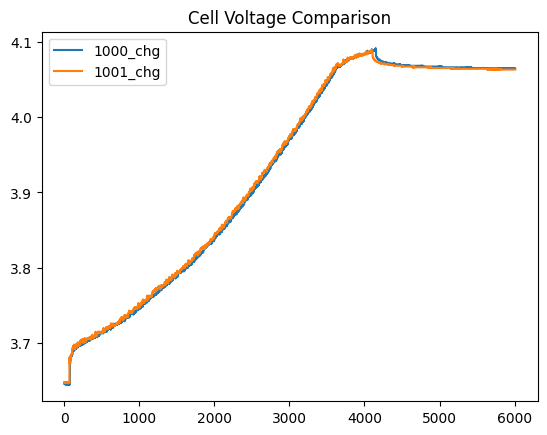

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_1000['M01CV01'], label='1000_chg')
plt.plot(df_1001['M01CV01'], label='1001_chg')
plt.legend()
plt.title('Cell Voltage Comparison')
plt.show()


여기부터 PCA

In [ ]:
 #	PCA
import	numpy	as	np
import	pandas	as	pd
from	datetime	import	datetime
from	sklearn.decomposition	import	PCA
#	plot	utilities
import	matplotlib.pyplot	as	plt
import	plotly.graph_objects	as	go
#	PCA	차원	축소	테스트
df_pca	=	pd.read_csv('./data/preprocessed/train/1000_chg.csv')
print("Initial	data:	./data/preprocessed/train/1000_chg.csv")
print(df_pca.shape)
max_column	=	df_pca.shape[0]
max_row	=	df_pca.shape[1]
x	=	df_pca
pca	=	PCA(n_components=2)
principalComponents	=	pca.fit_transform(x)
principalDf	=	pd.DataFrame(data	=	principalComponents,
  columns	=	['principal	component	1',	'principal	component	2'])
print("principalDf	:	")
print(principalDf.head(5))
print("After	PCA:")
pca_1	=	np.array(principalDf['principal	component	1']	)
pca_2	=	np.array(principalDf['principal	component	2']	)
#	Create	traces
fig	=	go.Figure()
fig.add_trace(go.Scatter(x	=	pca_1,
  y	=	pca_2,
  mode	=	'lines+markers',
  name	=	'PCA'))
fig.update_layout(title	=	'PCA	분석	결과',
  xaxis_title	=	'principal	component	1',
  yaxis_title	=	'principal	component	2')
fig.show()

Initial	data:	./data/preprocessed/train/1000_chg.csv
(6009, 208)
principalDf	:	
   principal\tcomponent\t1  principal\tcomponent\t2
0               -18.634349                -0.564999
1               -18.635771                -0.571294
2               -18.635892                -0.570799
3               -18.634366                -0.564929
4               -18.666694                -0.565826
After	PCA:


이제 AI 선택, 학습 진행

In [ ]:
!pip install pyts
import	os
import	sys
import	numpy	as	np
import	pandas	as	pd
#	we	will	only	import	certain	module	from	those	libraries
from	mpl_toolkits.mplot3d	import	Axes3D
from	sklearn.preprocessing	import	StandardScaler
from	sklearn.preprocessing	import	MinMaxScaler
from	sklearn.decomposition	import	PCA
from	sklearn.covariance	import	EllipticEnvelope
from	sklearn.ensemble	import	IsolationForest
from	sklearn.impute	import	SimpleImputer
from	datetime	import	datetime
import	plotly.graph_objects	as	go
import	plotly.express	as	px
import	math
from	plotly.subplots	import	make_subplots
import	matplotlib.pyplot	as	plt
from	random	import	randrange
import	argparse
import	collections
import	tensorflow	as	tf
import	logging
from	tensorflow.keras	import	backend	as	K
from	tensorflow.keras.utils	import	plot_model
from	tensorflow.keras.layers	import	Input
from	tensorflow.keras.models	import	Model
from	tensorflow.keras.layers	import	Bidirectional,	LSTM,	Flatten,	Dense,	Reshape,	UpSampling1D,	TimeDistributed
from	tensorflow.keras.layers	import	Activation,	Conv1D,	LeakyReLU,	Dropout,	Add,	Layer
from	tensorflow.keras.layers	import	LSTM #from	tensorflow.compat.v1.keras.layers	import	CuDNNLSTM 의 최신화
from	tensorflow.keras.optimizers	import	Adam
import	pydot
import	pydotplus
from	pydotplus	import	graphviz
from	scipy	import	stats
from	scipy	import	integrate
from	scipy.optimize	import	fmin
from	pyts.metrics	import	dtw
from	pandas.plotting	import	register_matplotlib_converters

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.5 MB/s eta 0:00:00


In [ ]:
#
#	hyper	parameters
#
win_size	=10
features_dim	=3
feat_dim	=	features_dim
params	=	{}
params['plot_network']	=True
params['epochs']	=30
params['batch_size']	=64
params['n_critic']	=5
params['learning_rate']	=0.00005
params['latent_dim']	=20
params['shape']	=	[win_size,	features_dim]
params['encoder_input_shape']	=	[win_size,	features_dim]
params['encoder_reshape_shape']	=	[20,	1]
params['generator_input_shape']	=	[20,	1]
params['generator_reshape_shape']	=	[win_size,	1]
params['critic_x_input_shape']	=	[win_size,	features_dim]
params['critic_z_input_shape']	=	[20,	1]
print("win_size	=	%d,	features_dim	=	%d	"	%	(win_size,	features_dim))

win_size	=	10,	features_dim	=	3	


In [ ]:
arguments=collections.namedtuple('Args',
 'signal_file	timest_form	anomaly_file	mode	aggregate_interval	regate_interval')
args=arguments(signal_file	=	'./data/preprocessed/train/1000_chg.csv',
 timest_form	=	0,
 anomaly_file	=	'',
 mode	=	'train',
 aggregate_interval	=	1,
 regate_interval	=	1)
print("argments")
print("----------------------")
print("args.timest_form	:",	args.timest_form)
print("args.signal_file	:",	args.signal_file)
print("args.anomaly_file	:",	args.anomaly_file)
print("args.mode	:",	args.mode)
print("args.aggregate_interval	:",	args.aggregate_interval)
print("----------------------\n")

argments
----------------------
args.timest_form	: 0
args.signal_file	: ./data/preprocessed/train/1000_chg.csv
args.anomaly_file	: 
args.mode	: train
args.aggregate_interval	: 1
----------------------



In [ ]:
diffs_n	=0		#	take	differences
lags_n	=0		#	include	lags	in	the	feature	vector
smooth_n	=0		#	smooth	the	latest	values	to	be	included	in	the	feature	vector
print("diffs_n:	",	diffs_n)
#
def	diff_smooth_df(df,	lags_n,	diffs_n,	smooth_n,	diffs_abs=False,	abs_features=False):
  #Given	a	pandas	dataframe	preprocess	it	to	take	differences,	add	smoothing,	and	lags	as	specified.

  if	diffs_n	>=1:
  #	take	differences
    df	=	df.diff(diffs_n).dropna()
    #	abs	diffs	if	defined
    if	diffs_abs	==True:
      df	=	abs(df)
  if	smooth_n	>=2:
  #	apply	a	rolling	average	to	smooth	out	the	data	a	bit
    df	=	df.rolling(smooth_n).mean().dropna()
  if	lags_n	>=1:
 #	for	each	dimension	add	a	new	columns	for	each	of	lags_n	lags	of	the	differenced	and	smoothed	values	for	that	dimension
    df_columns_new	=	[f'{col}_lag{n}'for	n	in	range(lags_n+1)	for	col	in	df.columns]
    df	=	pd.concat([df.shift(n)	for	n	in	range(lags_n+1)],	axis	=1).dropna()
    df.columns	=	df_columns_new
 #	sort	columns	to	have	lagged	values	next	to	each	other	for	clarity	when	looking	at	the	feature	vectors
  df	=	df.reindex(sorted(df.columns),	axis	=1)
 #	abs	all	features	if	specified
  if	abs_features	==True:
    df	=	abs(df)
  return	df
print("import	diff_smooth_df()	:	Done	!	"	)

diffs_n:	 0
import	diff_smooth_df()	:	Done	!	


In [ ]:
########	PCA	reduction	of	data	################################
signal_path	=	args.signal_file
df_train_0=	pd.read_csv(signal_path)
data_0	=	df_train_0		#	copy
#	preprocess	or	‘featurize’	the	training	data
data_1	=	diff_smooth_df(data_0,	lags_n,	diffs_n,	smooth_n)
pca	=	PCA(n_components=features_dim)
data	=	pca.fit_transform(data_1)		#	Dimensional	reduction	of	Train	Data	by	PCA
df_1	=	[]
for	i	in	range(len(data)):
  row	=	[i+1]	#	attach	index	of	integers
  for	jj	in	range(features_dim):
    row.append(data[i][jj])
  df_1.append(row)
df	=	pd.DataFrame(df_1)
columns_new	=	['date']
for	i	in	range(1,	features_dim+1):
  pca_i	='pca_%s'	%	str(i)
  columns_new.append(pca_i)
df.columns	=	columns_new
print("After	PCA	reduction	df.shape	=	",	df.shape)
print("----------------------")
print(df.head(5))
print("----------------------")
print("\n")

After	PCA	reduction	df.shape	=	 (6009, 4)
----------------------
   date      pca_1     pca_2     pca_3
0     1 -18.634349 -0.564999 -0.261410
1     2 -18.635771 -0.571294 -0.263656
2     3 -18.635892 -0.570799 -0.263567
3     4 -18.634366 -0.564929 -0.261397
4     5 -18.666694 -0.565826 -0.255594
----------------------




In [ ]:
def	time_segments_aggregate(X,	interval,	time_column,	method=['mean']):
  """Aggregate	values	over	given	time	span.
  Args:
  X	(ndarray	or	pandas.DataFrame):	N-dimensional	sequence	of	values.
  interval	(int):	Integer	denoting	time	span	to	compute	aggregation	of.
  time_column	(int):		Column	of	X	that	contains	time	values.
  method	(str	or	list):
  Optional.	String	describing	aggregation	method	or	list	of	strings	describing
  multiple	aggregation	methods.	If	not	given,	`mean`	is	used.
  Returns:
  ndarray,	ndarray:
  *	Sequence	of	aggregated	values,	one	column	for	each	aggregation	method.
  *	Sequence	of	index	values	(first	index	of	each	aggregated	segment).
  """
  if	isinstance(X,	np.ndarray):
    X	=	pd.DataFrame(X)
  X	=	X.sort_values(time_column).set_index(time_column)
  if	isinstance(method,	str):
    method	=	[method]
  start_ts	=	X.index.values[0]
  max_ts	=	X.index.values[-1]
  values	=	list()
  index	=	list()
  while	start_ts	<=	max_ts:
    end_ts	=	start_ts	+	interval
    subset	=	X.loc[start_ts:end_ts-1]
    aggregated	=	[
    getattr(subset,	agg)(skipna=True).values
    for	agg	in	method
    ]
    values.append(np.concatenate(aggregated))
    index.append(start_ts)
    start_ts	=	end_ts
  return	np.asarray(values),	np.asarray(index)

In [ ]:
#
#	aggregate	time	segments
#
X,	index	=	time_segments_aggregate(df,	interval=args.aggregate_interval,
  time_column='date')
print("signal	data	(after	time_segments_aggregate)	=	",	X.shape)
print("----------------------")
print(X[:5])
print("----------------------")
print("\n")
#
#	apply	min_max	scaler
#
X	=	SimpleImputer().fit_transform(X)
X	=	MinMaxScaler(feature_range=(-1,	1)).fit_transform(X)
print("X	(after	MinMaxScaler)	=	",	X.shape)
print("----------------------")
print(X[:5])
print("----------------------")
print("\n")
X_norm	=	X

signal	data	(after	time_segments_aggregate)	=	 (6009, 3)
----------------------
[[-18.6343489   -0.56499908  -0.26141038]
 [-18.63577092  -0.57129376  -0.26365645]
 [-18.63589171  -0.57079932  -0.26356652]
 [-18.63436617  -0.56492876  -0.26139721]
 [-18.66669403  -0.56582562  -0.25559404]]
----------------------


X	(after	MinMaxScaler)	=	 (6009, 3)
----------------------
[[-0.99721634 -0.48867576 -0.26892606]
 [-0.99732535 -0.49487412 -0.27233804]
 [-0.99733461 -0.49438724 -0.27220142]
 [-0.99721766 -0.48860651 -0.26890604]
 [-0.99969584 -0.48948965 -0.2600905 ]]
----------------------




In [ ]:
def	rolling_window_sequences(X,	index,	window_size,	target_size,	step_size,
  target_column,	drop=None,	drop_windows=False):
  """Create	rolling	window	sequences	out	of	time	series	data.
  The	function	creates	an	array	of	input	sequences	and	an	array	of	target	sequences
  by	rolling	over	the	input	sequence	with	a	specified	window.	Optionally,	certain
  values	can	be	dropped	from	the	sequences.
  Args:
  X	(ndarray):	N-dimensional	sequence	to	iterate	over.
  index	(ndarray):	Array	containing	the	index	values	of	X.
  window_size	(int):		Length	of	the	input	sequences.
  target_size	(int):	Length	of	the	target	sequences.
  step_size	(int):
  Indicating	the	number	of	steps	to	move	the	window	forward	each	round.
  target_column	(int):	Indicating	which	column	of	X	is	the	target.
  drop	(ndarray	or	None	or	str	or	float	or	bool):
  Optional.	Array	of	boolean	values	indicating	which	values	of	X	are	invalid,
  or	value	indicating	which	value	should	be	dropped.	If	not	given,
  `None`	is	used.
  drop_windows	(bool):	Optional.	Indicates	whether	the	dropping
  functionality	should	be	enabled.	If	not	given,	`False`	is	used.
  Returns:
  ndarray,	ndarray,	ndarray,	ndarray:
  *	input	sequences.
  *	target	sequences.
  *	first	index	value	of	each	input	sequence.
  *	first	index	value	of	each	target	sequence.
  """
  out_X	=	list()
  out_y	=	list()
  X_index	=	list()
  y_index	=	list()
  target	=	X[:,	target_column]
  if	drop_windows:
    if	hasattr(drop,	'__len__')	and	(not	isinstance(drop,	str)):
      if	len(drop)	!=	len(X):
       raise	Exception('Arrays	`drop`	and	`X`	must	be	of	the	same	length.')
    else:
      if	isinstance(drop,	float)	and	np.isnan(drop):
        drop	=	np.isnan(X)
      else:
        drop	=	X	==	drop
  start	=0
  max_start	=	len(X)	-	window_size	-	target_size	+	1
  while	start	<	max_start:
    end	=	start	+	window_size
    if	drop_windows:
      drop_window	=	drop[start:end+target_size]
      to_drop	=	np.where(drop_window)[0]
      if	to_drop.size:
        start	+=	to_drop[-1]	+	1
        continue
    out_X.append(X[start:end])
    out_y.append(target[end:end+target_size])
    X_index.append(index[start])
    y_index.append(index[end])
    start	=	start	+	step_size
  return	np.asarray(out_X),	np.asarray(out_y),	np.asarray(X_index),	np.asarray(y_index)

In [ ]:
 #	rolling	window	sequences
 #
X,	y,	X_index,	y_index=rolling_window_sequences(X,	index,
  window_size=win_size,		target_size=1,	step_size=1,	target_column=0)
print("X	shape	(after	rolling_window_seq):	{}".format(X.shape))
print("X	:	")
print(X[:3,	:5])
print("X	index	shape:	{}".format(X_index.shape))
print("y	shape:	{}".format(y.shape))
print("y	:	")
print(y[:5])
print("y	index	shape:	{}".format(y_index.shape))
print("\n");

X	shape	(after	rolling_window_seq):	(5999, 10, 3)
X	:	
[[[-0.99721634 -0.48867576 -0.26892606]
  [-0.99732535 -0.49487412 -0.27233804]
  [-0.99733461 -0.49438724 -0.27220142]
  [-0.99721766 -0.48860651 -0.26890604]
  [-0.99969584 -0.48948965 -0.2600905 ]]

 [[-0.99732535 -0.49487412 -0.27233804]
  [-0.99733461 -0.49438724 -0.27220142]
  [-0.99721766 -0.48860651 -0.26890604]
  [-0.99969584 -0.48948965 -0.2600905 ]
  [-0.99729103 -0.49165725 -0.27192521]]

 [[-0.99733461 -0.49438724 -0.27220142]
  [-0.99721766 -0.48860651 -0.26890604]
  [-0.99969584 -0.48948965 -0.2600905 ]
  [-0.99729103 -0.49165725 -0.27192521]
  [-0.99741076 -0.49573991 -0.26903184]]]
X	index	shape:	(5999,)
y	shape:	(5999, 1)
y	:	
[[-0.99860594]
 [-0.99594234]
 [-0.99452801]
 [-1.        ]
 [-0.9959476 ]]
y	index	shape:	(5999,)




In [ ]:
 #	Check	gpu	envrionmental
gpus	=	tf.config.experimental.list_physical_devices('GPU')
if	gpus:
				try:
								for	gpu	in	gpus:
												tf.config.experimental.set_memory_growth(gpu,	True)
				except	RuntimeError	as	e:
								print(e)
print	(gpus)

[]


In [ ]:
class	RandomWeightedAverage(Layer):
				def call(self, inputs, **kwargs):
								# 현재 배치 길이를 런타임에 얻음
								batch = tf.shape(inputs[0])[0]
								alpha = K.random_uniform((batch, 1, 1))   # (B,1,1)
								return (alpha * inputs[0]) + ((1. - alpha) * inputs[1])
print("RandomWeightedAverage()	Class	defined,	Done!	")

RandomWeightedAverage()	Class	defined,	Done!	


In [ ]:
def	build_encoder_layer(input_shape,	encoder_reshape_shape):
  """build	encoder	layer
  Args:
  encoder_input_shape:	[10,	1]
  encoder_reshape_shape:	[20,	1]
  Returns:
  encoder	model
  """
  x	=	Input(shape=input_shape)
  model	=	tf.keras.models.Sequential([
    Bidirectional(LSTM(units=win_size,	return_sequences=True)),
    Flatten(),
    Dense(20),		#	20	=	self.critic_z_input_shape[0]
    Reshape(target_shape=encoder_reshape_shape)])		#	(20,	1)
  return	Model(x,	model(x))
print("build	encoder	layer	defined,	Done!")

build	encoder	layer	defined,	Done!


In [ ]:
def	build_generator_layer(input_shape,	generator_reshape_shape):
  #	input_shape	=	(20,	1)	/	generator_reshape_shape	=	(50,	1)
  x	=	Input(shape=input_shape)
  model	=	tf.keras.models.Sequential([
    Flatten(),
    Dense(win_size),					#		50	originally
    Reshape(target_shape=generator_reshape_shape),		#	(50,	1)
    Bidirectional(LSTM(units=64,	return_sequences=True),	merge_mode='concat'),
    Dropout(rate=0.2),
    #UpSampling1D(size=2),
    UpSampling1D(size=1),
    Bidirectional(LSTM(units=64,	return_sequences=True),	merge_mode='concat'),
    Dropout(rate=0.2),
    TimeDistributed(Dense(features_dim)),		#	features_dim	>=1,	multiple	features
    Activation(activation='tanh')])		#	(None,	10,	1)
  return	Model(x,	model(x))
print("build	generator	layer	defined,	Done!")

build	generator	layer	defined,	Done!


In [ ]:
if	win_size	>=	30:
  k_size	=	5
else:
  k_size	=	2
def	build_critic_x_layer(input_shape):
  """build	critic_x	layer
  Args:
  critic_x_input_shape:	[10,	1]
  Returns:
  critic_x	model
  """
  x	=	Input(shape=input_shape)
  model	=	tf.keras.models.Sequential([
    Conv1D(filters=64,	kernel_size=k_size),
    LeakyReLU(alpha=0.2),
    Dropout(rate=0.25),
    Conv1D(filters=64,	kernel_size=k_size),
    LeakyReLU(alpha=0.2),
    Dropout(rate=0.25),
    Conv1D(filters=64,	kernel_size=k_size),
    LeakyReLU(alpha=0.2),
    Dropout(rate=0.25),
    Conv1D(filters=64,	kernel_size=k_size),
    LeakyReLU(alpha=0.2),
    Dropout(rate=0.25),
    Flatten(),
    Dense(units=1)])
  return	Model(x,	model(x))
print("build	critic_x	layer	defined,	Done!")

build	critic_x	layer	defined,	Done!


In [ ]:
def	build_critic_z_layer(input_shape):
  """build	critic_z	layer
  Args:
  critic_z_input_shape:	[20,	1]
  Returns:
  critic_z	model
  """
  x	=	Input(shape=input_shape)
  model	=	tf.keras.models.Sequential([
    Flatten(),
    Dense(units=100),
    LeakyReLU(alpha=0.2),
    Dropout(rate=0.2),
    Dense(units=100),
    LeakyReLU(alpha=0.2),
    Dropout(rate=0.2),
    Dense(units=1)])
  return	Model(x,	model(x))
print("build	critic_z	layer	defined,	Done!")

build	critic_z	layer	defined,	Done!


In [ ]:
def	wasserstein_loss(y_true,	y_pred):
  """calculate	wasserstein	loss
  Args:
  y_true:	real	value
  y_pred:	predic	value
  Returns:
  loss:	wasserstein	loss
  """
  return	K.mean(y_true*y_pred)
print("Wasserstein_loss	defined,	Done!")

Wasserstein_loss	defined,	Done!


In [ ]:
#
ckpt_dir	=	os.path.join(os.getcwd(),	'checkpoints')
os.makedirs(ckpt_dir,	exist_ok=True)
network_dir	=	os.path.join(os.getcwd(),	'networks')
os.makedirs(network_dir,	exist_ok=True)
#	plot	network
plot_network	=	params['plot_network']
#	Training	Parameters
batch_size	=	params['batch_size']
n_critics	=	params['n_critic']
epochs	=	params['epochs']
#	Layer	Parameters
shape	=	params['shape']
window_size	=	shape[0]
feat_dim	=	shape[1]
latent_dim	=	params['latent_dim']
encoder_input_shape	=	params['encoder_input_shape']
generator_input_shape	=	params['generator_input_shape']
critic_x_input_shape	=	params['critic_x_input_shape']
critic_z_input_shape	=	params['critic_z_input_shape']
encoder_reshape_shape	=	params['encoder_reshape_shape']
generator_reshape_shape	=	params['generator_reshape_shape']
print('init	MTadGAN')
print("latent_dim=	",	latent_dim)
print("shape=	",	shape)
print("encoder_input_shape=	",	encoder_input_shape)
print("generator_input_shape=	",	generator_input_shape)
print("critic_x_input_shape=	",	critic_x_input_shape)
print("critic_z_input_shape=	",	critic_z_input_shape)
print("encoder_reshape_shape=	",	encoder_reshape_shape)
print("generator_reshape_shape=	",	generator_reshape_shape)

init	MTadGAN
latent_dim=	 20
shape=	 [10, 3]
encoder_input_shape=	 [10, 3]
generator_input_shape=	 [20, 1]
critic_x_input_shape=	 [10, 3]
critic_z_input_shape=	 [20, 1]
encoder_reshape_shape=	 [20, 1]
generator_reshape_shape=	 [10, 1]


In [ ]:
learning_rate	=0.0005
encoder	=	build_encoder_layer(input_shape=encoder_input_shape,
                                                          encoder_reshape_shape=encoder_reshape_shape)
generator	=	build_generator_layer(input_shape=generator_input_shape,
                                                                  generator_reshape_shape=generator_reshape_shape)
critic_x	=	build_critic_x_layer(input_shape=critic_x_input_shape)
critic_z	=	build_critic_z_layer(input_shape=critic_z_input_shape)
optimizer_cx = tf.keras.optimizers.Adam(learning_rate)
optimizer_cz = tf.keras.optimizers.Adam(learning_rate)
optimizer_gen = tf.keras.optimizers.Adam(learning_rate)
print("optimizer_cx	optimizer_cz	optimizer_gen	defined:	Done!")
print("encoder	generator	critic_x	critic_z	and	optimizer	instance	defined:	Done!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning:

Argument `alpha` is deprecated. Use `negative_slope` instead.



optimizer_cx	optimizer_cz	optimizer_gen	defined:	Done!
encoder	generator	critic_x	critic_z	and	optimizer	instance	defined:	Done!


In [ ]:
z	=	Input(shape=(latent_dim,	1))
x	=	Input(shape=shape)
x_	=	generator(z)
z_	=	encoder(x)
fake_x	=	critic_x(x_)
valid_x	=	critic_x(x)
interpolated_x	=	RandomWeightedAverage(batch_size)([x,	x_])
critic_x_model	=	Model(inputs=[x,	z],	outputs=[valid_x,	fake_x,	interpolated_x])
fake_z	=	critic_z(z_)
valid_z	=	critic_z(z)
interpolated_z	=	RandomWeightedAverage(batch_size)([z,	z_])
critic_z_model	=	Model(inputs=[x,	z],	outputs=[valid_z,	fake_z,	interpolated_z])
z_gen	=	Input(shape=(latent_dim,	1))
x_gen_	=	generator(z_gen)
x_gen	=	Input(shape=shape)
z_gen_	=	encoder(x_gen)
x_gen_rec	=	generator(z_gen_)
fake_gen_x	=	critic_x(x_gen_)
fake_gen_z	=	critic_z(z_gen_)
encoder_generator_model	=	Model([x_gen,	z_gen],	[fake_gen_x,	fake_gen_z,	x_gen_rec])

TypeError: Layer.__init__() takes 1 positional argument but 2 were given

In [ ]:
if	os.path.isfile(os.path.join(ckpt_dir,	'critic_x_model.h5')):
  print("load	critic_x	weights")
  critic_x_model.load_weights(os.path.join(ckpt_dir,	'critic_x_model.h5'))
if	os.path.isfile(os.path.join(ckpt_dir,	'critic_z_model.h5')):
  print("load	critic_z	weights")
  critic_z_model.load_weights(os.path.join(ckpt_dir,	'critic_z_model.h5'))
if	os.path.isfile(os.path.join(ckpt_dir,	'encoder_generator_model.h5')):
  print("load	encoder_generator	weights")
  encoder_generator_model.load_weights(os.path.join(
  ckpt_dir,
  'encoder_generator_model.h5'))
critic_x_model.summary()
critic_z_model.summary()
encoder_generator_model.summary()
if	plot_network:
  plot_model(critic_x_model,
    to_file=os.path.join(network_dir,	'critic_x_model_tf2.png'),
      show_shapes=True,
    expand_nested=True)
  plot_model(critic_z_model,
    to_file=os.path.join(network_dir,	'critic_z_model_tf2.png'),
    show_shapes=True,
    expand_nested=True)
  plot_model(encoder_generator_model,
    to_file=os.path.join(network_dir,'enc_gen_model_tf2.png'),
    show_shapes=True,
    expand_nested=True)
print("critic_x_model	critic_z_model	and	encode_generator_model	defined:	Done!")

In [ ]:
@tf.function
def	critic_x_train_on_batch(x,	z,	valid,	fake,	delta, optimizer):
  with	tf.GradientTape()	as	tape:
    (valid_x,	fake_x,	interpolated)	=	critic_x_model(inputs=[x,	z],	training=True)
    with	tf.GradientTape()	as	gp_tape:
      gp_tape.watch(interpolated)
      pred	=	critic_x(interpolated,	training=True)
    grads	=	gp_tape.gradient(pred,	interpolated)[0]
    grads	=	tf.square(grads)
    ddx	=	tf.sqrt(1e-8	+	tf.reduce_sum(grads,	axis=np.arange(1,	len(grads.shape))))
    gp_loss	=	tf.reduce_mean((ddx-1.0)	**2)
    loss	=	tf.reduce_mean(wasserstein_loss(valid,	valid_x))
    loss	+=	tf.reduce_mean(wasserstein_loss(fake,	fake_x))
    loss	+=	gp_loss*10.0
  gradients	=	tape.gradient(loss,	critic_x_model.trainable_weights)
  optimizer.apply_gradients(zip(gradients,	critic_x_model.trainable_weights))
  return	loss
print("critic_x_train_on_batch	defined:	Done!")

In [ ]:
#@tf.function
def	critic_z_train_on_batch(x,	z,	valid,	fake,	delta,optimizer):
  with	tf.GradientTape()	as	tape:
    (valid_z,	fake_z,	interpolated)	=	critic_z_model(inputs=[x,	z],	training=True)
    with	tf.GradientTape()	as	gp_tape:
      gp_tape.watch(interpolated)
      pred	=	critic_z(interpolated,	training=True)
    grads	=	gp_tape.gradient(pred,	interpolated)[0]
    grads	=	tf.square(grads)
    ddx	=	tf.sqrt(1e-8	+	tf.reduce_sum(grads,	axis=np.arange(1,	len(grads.shape))))
    gp_loss	=	tf.reduce_mean((ddx	-1.0)	**2)
    loss	=	tf.reduce_mean(wasserstein_loss(valid,	valid_z))
    loss	+=	tf.reduce_mean(wasserstein_loss(fake,	fake_z))
    loss	+=	gp_loss*10.0
  gradients	=	tape.gradient(loss,	critic_z_model.trainable_weights)
  optimizer.apply_gradients(zip(gradients,	critic_z_model.trainable_weights))
  return	loss
print("critic_z_train_on_batch	defined:	Done!")

In [ ]:
@tf.function
def	enc_gen_train_on_batch(x,	z,	valid,optimizer):
  with	tf.GradientTape()	as	tape:
    (fake_gen_x,	fake_gen_z,	x_gen_rec)	=	encoder_generator_model(inputs=[x,	z],	training=True)
    x	=	tf.squeeze(x)
    x_gen_rec	=	tf.squeeze(x_gen_rec)
    loss	=	tf.reduce_mean(wasserstein_loss(valid,	fake_gen_x))
    loss	+=	tf.reduce_mean(wasserstein_loss(valid,	fake_gen_z))
    loss	+=	tf.keras.losses.MSE(x,	x_gen_rec)*10
    loss	=	tf.reduce_mean(loss)
  gradients	=	tape.gradient(loss,	encoder_generator_model.trainable_weights)
  optimizer.apply_gradients(zip(gradients,	encoder_generator_model.trainable_weights))
  return	loss
print("enc_gen_train_on_batch	defined:	Done!")

In [ ]:
#	Train

X	=	X.reshape((-1,	shape[0],	feat_dim))			#	feat_dim	=	features	dimension
X_	=	np.copy(X)
fake	=	np.ones((batch_size,	1),	dtype=np.float32)
valid	=	-np.ones((batch_size,	1),	dtype=np.float32)
delta	=	np.ones((batch_size,	1),	dtype=np.float32)
for	epoch	in	range(1,	epochs+1):
  np.random.shuffle(X_)
  epoch_g_loss	=	[]
  epoch_cx_loss	=	[]
  epoch_cz_loss	=	[]
  minibatches_size	=	batch_size	*	n_critics
  num_minibatches	=	int(X_.shape[0]	//	minibatches_size)
  for	i	in	range(num_minibatches):
    minibatch	=	X_[i	*	minibatches_size:(i+1)	*	minibatches_size]
    #	train	critics
    critic_x.trainable	=	True
    critic_z.trainable	=	True
    generator.trainable	=	False
    encoder.trainable	=	False
    for	j	in	range(n_critics):
      x	=	minibatch[j	*	batch_size:(j+1)	*	batch_size]
      z	=	np.random.normal(size=(batch_size,	latent_dim,	1))
      epoch_cx_loss.append(critic_x_train_on_batch(x,	z,	valid,	fake,	delta,optimizer_cx))
      epoch_cz_loss.append(critic_z_train_on_batch(x,	z,	valid,	fake,	delta,optimizer_cz))
    critic_x.trainable	=	False
    critic_z.trainable	=	False
    generator.trainable	=	True
    encoder.trainable	=	True
    #	train	encoder,	generator
    epoch_g_loss.append(enc_gen_train_on_batch(x,	z,	valid,optimizer_gen))
  cx_loss	=	np.mean(np.array(epoch_cx_loss),	axis=0)
  cz_loss	=	np.mean(np.array(epoch_cz_loss),	axis=0)
  g_loss	=	np.mean(np.array(epoch_g_loss),	axis=0)
  print('Epoch:	{}/{},	[Dx	loss:	{}]	[Dz	loss:	{}]	[G	loss:	{}]'.format(epoch,	epochs,	cx_loss,	cz_loss,	g_loss))
critic_x_model.save_weights(os.path.join(ckpt_dir,	'critic_x_model.weights.h5'))
critic_z_model.save_weights(os.path.join(ckpt_dir,	'critic_z_model.weights.h5'))
encoder_generator_model.save_weights(os.path.join(ckpt_dir,
'encoder_generator_model.weights.h5'))

테스트 데이터에 대한 계산 수행

In [ ]:
def	predict(X):
  """Predict	values	using	the	initialized	object.
  Args:
  X	(ndarray):	N-dimensional	array	containing	the	input	sequences	for	the	model.
  Returns:
  ndarray:
  N-dimensional	array	containing	the	reconstructions	for	each	input	sequence.
  ndarray:
  N-dimensional	array	containing	the	critic	scores	for	each	input	sequence.
  """
  X	=	X.reshape((-1,	shape[0],	feat_dim))			#	feat_dim	:	feature	dimension	(modified	from	1:	yeesj)
  z_	=	encoder.predict(X)
  y_hat	=	generator.predict(z_)
  critic	=	critic_x.predict(X)
  return	y_hat,	critic
print("predict()	defined:	Done!")

In [ ]:
#	Prediction	test	mode
#	New	test	data	file	introduced
args=arguments(signal_file='./data/preprocessed/test/Test07_NG_dchg.csv',
  timest_form=0,
  anomaly_file='./data/preprocessed/test/Test07_NG_dchg_Label.csv',
  mode='predict',
  aggregate_interval=1,
  regate_interval=1)
print("argments	for	prediction	mode")
print("----------------------")
print("args.timest_form	:",	args.timest_form)
print("args.signal_file	:",	args.signal_file)
print("args.anomaly_file	:",	args.anomaly_file)
print("args.mode	:",	args.mode)
print("args.aggregate_interval	:",	args.aggregate_interval)
print("----------------------\n")

argments	for	prediction	mode
----------------------
args.timest_form	: 0
args.signal_file	: ./data/preprocessed/test/Test07_NG_dchg.csv
args.anomaly_file	: ./data/preprocessed/test/Test07_NG_dchg_Label.csv
args.mode	: predict
args.aggregate_interval	: 1
----------------------



In [ ]:
file_path	=	args.signal_file
df_test1	=	pd.read_csv(file_path)	#	using	pandas	library	(pd)	to	read	the	csv	file.
#	After	reading	the	file,	it	will	be	used	as	a	Pandas	DataFrame.

In [ ]:
########	PCA	reduction	of	data	########
data_0	=	df_test1			#	copy
#	(lags_n=0,	diffs_n=0,	smooth_n=0)
data_1	=	diff_smooth_df(data_0,	lags_n,	diffs_n,	smooth_n)
pca	=	PCA(n_components=features_dim)
data	=	pca.fit_transform(data_1)		#	Dimensional	reduction	of	Train	Data	by	PCA
df_1	=	[]
for	i	in	range(len(data)):
  row=[i+1]	#	attach	index	of	integers
  for	jj	in	range(features_dim):
    row.append(data[i][jj])
  df_1.append(row)
df	=	pd.DataFrame(df_1)
columns_new	=	['date']
for	i	in	range(1,	features_dim+1):
  pca_i	=	'pca_%s'	%	str(i)
  columns_new.append(pca_i)
df.columns=columns_new
print("After	PCA	reduction	of	test	data	df.shape	=	",	df.shape)
print("----------------------")
print(df.head(5))
print("-----------------------")
print("\n")

After	PCA	reduction	of	test	data	df.shape	=	 (4594, 4)
----------------------
   date     pca_1     pca_2     pca_3
0     1 -0.412390 -0.583290 -0.027635
1     2 -0.406833 -0.567894 -0.026530
2     3 -0.368969 -0.575905 -0.015943
3     4 -0.430940 -0.547513 -0.026097
4     5 -0.425380 -0.532116 -0.025033
-----------------------




In [ ]:
#	aggregate	time	segments
#
X,	index	=	time_segments_aggregate(df,	interval=args.aggregate_interval,
time_column='date')
print("Test	signal	data	(after	time_segments_aggregate)	=	",	X.shape)
print("----------------------")
print(X[:5])
print("----------------------")
print("\n")

Test	signal	data	(after	time_segments_aggregate)	=	 (4594, 3)
----------------------
[[-0.41238968 -0.58329017 -0.0276354 ]
 [-0.40683279 -0.56789384 -0.0265303 ]
 [-0.36896933 -0.57590513 -0.01594296]
 [-0.43094009 -0.54751303 -0.02609664]
 [-0.42538006 -0.53211572 -0.02503347]]
----------------------




In [ ]:
#
#	apply	min_max	scaler
#
X	=	SimpleImputer().fit_transform(X)
X	=	MinMaxScaler(feature_range=(-1,	1)).fit_transform(X)
print("Test	X	(after	MinMaxScaler)	=	",	X.shape)
print("----------------------")
print(X[:5])
print("----------------------")
print("\n")

Test	X	(after	MinMaxScaler)	=	 (4594, 3)
----------------------
[[-0.98179734 -1.         -0.02048601]
 [-0.97807563 -0.96581491 -0.01806055]
 [-0.95271669 -0.9836027   0.00517632]
 [-0.99422142 -0.92056261 -0.01710877]
 [-0.9904976  -0.88637537 -0.01477535]]
----------------------




In [ ]:
#	rolling	window	sequences
X,	y,	X_index,	y_index	=	rolling_window_sequences(X,	index,	window_size=	win_size,
target_size=1,	step_size=1,	target_column=0	)
print("X	shape	(after	rolling_window_seq):	{}".format(X.shape))
print("X	:	")
print(X[:3,	:5])
print("X	index	shape:	{}".format(X_index.shape))
print("y	shape:	{}".format(y.shape))
print("y	:	")
print(y[:5])
print("y	index	shape:	{}".format(y_index.shape))
print("\n");

X	shape	(after	rolling_window_seq):	(4584, 10, 3)
X	:	
[[[-9.81797342e-01 -1.00000000e+00 -2.04860122e-02]
  [-9.78075631e-01 -9.65814915e-01 -1.80605465e-02]
  [-9.52716695e-01 -9.83602699e-01  5.17631887e-03]
  [-9.94221418e-01 -9.20562609e-01 -1.71087653e-02]
  [-9.90497602e-01 -8.86375369e-01 -1.47753545e-02]]

 [[-9.78075631e-01 -9.65814915e-01 -1.80605465e-02]
  [-9.52716695e-01 -9.83602699e-01  5.17631887e-03]
  [-9.94221418e-01 -9.20562609e-01 -1.71087653e-02]
  [-9.90497602e-01 -8.86375369e-01 -1.47753545e-02]
  [-9.60544156e-01 -9.71166824e-01  9.41445919e-04]]

 [[-9.52716695e-01 -9.83602699e-01  5.17631887e-03]
  [-9.94221418e-01 -9.20562609e-01 -1.71087653e-02]
  [-9.90497602e-01 -8.86375369e-01 -1.47753545e-02]
  [-9.60544156e-01 -9.71166824e-01  9.41445919e-04]
  [-9.79474899e-01 -9.25988790e-01 -1.28571931e-02]]]
X	index	shape:	(4584,)
y	shape:	(4584, 1)
y	:	
[[-0.97946452]
 [-0.99049121]
 [-0.9904851 ]
 [-0.97807195]
 [-0.97945813]]
y	index	shape:	(4584,)




In [ ]:
#	anomalies.py		(1)
"""
Time	Series	anomaly	detection	functions.
Some	of	the	implementation	is	inspired	by	the	paper
https://arxiv.org/pdf/1802.04431.pdf
"""
class	Anomaly(object):
  def	__init__(self):
    pass
  def	_deltas(self,	errors,	epsilon,	mean,	std):
    """Compute	mean	and	std	deltas.
    delta_mean	=	mean(errors)	-	mean(all	errors	below	epsilon)
    delta_std	=	std(errors)	-	std(all	errors	below	epsilon)
    Args:
    errors	(ndarray):	Array	of	errors.
    epsilon	(ndarray):	Threshold	value.
    mean	(float):	Mean	of	errors.
    std	(float):	Standard	deviation	of	errors.
    Returns:
    float,	float:
    *	delta_mean.
    *	delta_std.
    """
    below	=	errors[errors	<=	epsilon]
    if	not	len(below):
      return	0,	0
    return	mean	-	below.mean(),	std	-	below.std()
  #	anomalies.py		(2)
  def	_count_above(self,	errors,	epsilon):
    """Count	number	of	errors	and	continuous	sequences	above	epsilon.
    Continuous	sequences	are	counted	by	shifting	and	counting	the	number
    of	positions	where	there	was	a	change	and	the	original	value	was	true,
    which	means	that	a	sequence	started	at	that	position.
    Args:
    errors	(ndarray):	Array	of	errors.
    epsilon	(ndarray):	Threshold	value.
    Returns:
    int,	int:
    *	Number	of	errors	above	epsilon.
    *	Number	of	continuous	sequences	above	epsilon.
    """
    above	=	errors	>	epsilon
    total_above	=len(errors[above])
    above	=	pd.Series(above)
    shift	=	above.shift(1)
    change	=	above	!=	shift
    total_consecutive	=	sum(above	&	change)
    return	total_above,	total_consecutive
  #	anomalies.py		(3)
  def	_z_cost(self,	z,	errors,	mean,	std):
    """Compute	how	bad	a	z	value	is.
    The	original	formula	is::
    (delta_mean/mean)	+	(delta_std/std)-----------------------------------------------------
    number	of	errors	above	+	(number	of	sequences	above)^2
    which	computes	the	\"goodness\"	of	`z`,	meaning	that	the	higher	the	value
    the	better	the	`z`.
    84
    「전자부품(배터리팩) 품질보증 AI 데이터셋」 분석실습 가이드북
    85
    In	this	case,	we	return	this	value	inverted	(we	make	it	negative),
    to	convert	it	into	a	cost	function,	as	later	on	we	will	use	scipy.fmin
    to	minimize	it.
    Args:
            z	(ndarray):	Value	for	which	a	cost	score	is	calculated.
            errors	(ndarray):	Array	of	errors.
            mean	(float):	Mean	of	errors.
            std	(float):	Standard	deviation	of	errors.
    Returns			float:	Cost	of	z.
    """
    epsilon	=	mean	+	z	*	std
    delta_mean,	delta_std	=self._deltas(errors,	epsilon,	mean,	std)
    above,	consecutive	=self._count_above(errors,	epsilon)
    numerator	=-(delta_mean	/	mean	+	delta_std	/	std)
    denominator	=	above	+	consecutive	**2
    if	denominator	==0:
      return	np.inf
    return	numerator	/	denominator
        #	anomalies.py		(4)
  def	_find_threshold(self,	errors,	z_range):
    """Find	the	ideal	threshold.
    The	ideal	threshold	is	the	one	that	minimizes	the	z_cost	function.
    Scipy.fmin	is	used	to	find	the	minimum,	using	the	values	from	z_range	as
    starting	points.
    Args:
            errors	(ndarray):	Array	of	errors.
            z_range	(list):
                    List	of	two	values	denoting	the	range	out	of	which	the	start	points	for
                    the	scipy.fmin	function	are	chosen.
    Returns:	float:	Calculated	threshold	value.
    """
    mean	=	errors.mean()
    std	=	errors.std()
    min_z,	max_z	=	z_range
    best_z	=	min_z
    best_cost	=	np.inf
    for	z	in	range(min_z,	max_z):
      best	=	fmin(self._z_cost,	z,	args=(errors,	mean,	std),	full_output=True,
      disp=False)
      z,	cost	=	best[0:2]
      if	cost	<	best_cost:
        best_z	=	z[0]
    return	mean	+	best_z	*	std
  def	_fixed_threshold(self,	errors,	k=3.0):
    """Calculate	the	threshold.
    The	fixed	threshold	is	defined	as	k	standard	deviations	away	from	the	mean.
    Args:
            errors	(ndarray):	Array	of	errors.
    Returns:
            float:	Calculated	threshold	value.
    """
    mean	=	errors.mean()
    std	=	errors.std()
    return	mean	+	k	*	std

        #	anomalies.py		(5-1)
  def	_find_sequences(self,	errors,	epsilon,	anomaly_padding):
    """Find	sequences	of	values	that	are	above	epsilon.
    This	is	done	following	this	steps:
    「전자부품(배터리팩) 품질보증 AI 데이터셋」 분석실습 가이드북
    *	create	a	boolean	mask	that	indicates	which	values	are	above	epsilon.
    *	mark	certain	range	of	errors	around	True	values	with	a	True	as	well.
    *	shift	this	mask	by	one	place,	filing	the	empty	gap	with	a	False.
    *	compare	the	shifted	mask	with	the	original	one	to	see	if	there	are
    changes.
    *	Consider	a	sequence	start	any	point	which	was	true	and	has	changed.
    *	Consider	a	sequence	end	any	point	which	was	false	and	has	changed.
    Args:
    errors	(ndarray):	Array	of	errors.
    epsilon	(float):	Threshold	value.	All	errors	above	epsilon	are	considered	an
    anomaly.
    anomaly_padding	(int):
    Number	of	errors	before	and	after	a	found	anomaly	that	are	added	to
    the	anomalous	sequence.
    Returns:
    ndarray,	float:
    *	Array	containing	start,	end	of	each	found	anomalous	sequence.
    *	Maximum	error	value	that	was	not	considered	an	anomaly.
    """
    above	=	pd.Series(errors	>	epsilon)
    index_above	=	np.argwhere(above.values)
    for	idx	in	index_above.flatten():
      above[max(0,	idx	-	anomaly_padding):min(idx	+	anomaly_padding	+1,
      len(above))]	=True
    shift	=	above.shift(1).fillna(False)
    change	=	above	!=	shift
    if	above.all():
      max_below	=0
    else:
      max_below	=	max(errors[~above])
    index	=	above.index
    starts	=	index[above	&	change].tolist()
    ends	=	(index[~above	&	change]-1).tolist()
    if	len(ends)	==len(starts)-1:
      ends.append(len(above)-1)
    return	np.array([starts,	ends]).T,	max_below
  #	anomalies.py		(5-2)
  def	_get_max_errors(self,	errors,	sequences,	max_below):
    """Get	the	maximum	error	for	each	anomalous	sequence.
    Also	add	a	row	with	the	max	error	which	was	not	considered	anomalous.
    Table	containing	a	``max_error``	column	with	the	maximum	error	of	each
    sequence	and	the	columns	``start``	and	``stop``	with	the	corresponding	start
    and	stop	indexes,	sorted	descendingly	by	the	maximum	error.
    Args:
    errors	(ndarray):	Array	of	errors.
    sequences	(ndarray):	Array	containing	start,	end	of	anomalous	sequences
    max_below	(float):	Maximum	error	value	that	was	not	considered	an	anomaly.
    Returns:
    pandas.DataFrame:	DataFrame	object	containing	columns	``start``,	``stop``	and	``max_error``.
    """
    max_errors	=	[{
      'max_error':	max_below,
      'start':	-1,
      'stop':	-1
    }]
    for	sequence	in	sequences:
      start,	stop	=	sequence
      sequence_errors	=	errors[start:	stop	+1]

      max_errors.append({
            'start':	start,
            'stop':	stop,
            'max_error':	max(sequence_errors)
      })
    max_errors	=	pd.DataFrame(max_errors).sort_values('max_error',	ascending=False)
    return	max_errors.reset_index(drop=True)

  #	anomalies.py		(6)
  def	_prune_anomalies(self,	max_errors,	min_percent):
    """Prune	anomalies	to	mitigate	false	positives.
    This	is	done	by	following	these	steps:
            *	Shift	the	errors	1	negative	step	to	compare	each	value	with	the	next	one.
            *	Drop	the	last	row,	which	we	do	not	want	to	compare.
            *	Calculate	the	percentage	increase	for	each	row.
            *	Find	rows	which	are	below	``min_percent``.
            *	Find	the	index	of	the	latest	of	such	rows.
            *	Get	the	values	of	all	the	sequences	above	that	index.
    Args:
            max_errors	(pandas.DataFrame):	DataFrame	object	containing	columns	``start``,	``stop``	and	``max_error``.
            min_percent	(float):
                    Percentage	of	separation	the	anomalies	need	to	meet	between	themselves	and	the
                    highest	non-anomalous	error	in	the	window	sequence.
    Returns:
            ndarray:	Array	containing	start,	end,	max_error	of	the	pruned	anomalies.
    """
    next_error	=	max_errors['max_error'].shift(-1).iloc[:-1]
    max_error	=	max_errors['max_error'].iloc[:-1]
    increase	=	(max_error-next_error)	/	max_error
    too_small	=	increase	<	min_percent
    if	too_small.all():
      last_index	=-1
    else:
      last_index	=	max_error[~too_small].index[-1]
    return	max_errors[['start',	'stop',	'max_error']].iloc[0:	last_index+1].values

  #	anomalies.py		(7)
  def	_compute_scores(self,	pruned_anomalies,	errors,	threshold,	window_start):
    """Compute	the	score	of	the	anomalies.
    Calculate	the	score	of	the	anomalies	proportional	to	the	maximum	error	in	the	sequence
    and	add	window_start	timestamp	to	make	the	index	absolute.
    Args:
            pruned_anomalies	(ndarray):	Array	of	anomalies	containing	the	start,	end	and	max_error	for	all	anomalies	in	the	window.
            errors	(ndarray):	Array	of	errors.
            threshold	(float):	Threshold	value.
            window_start	(int):	Index	of	the	first	error	value	in	the	window.
    Returns:
            list:	List	of	anomalies	containing	start-index,	end-index,	score	for	each	anomaly.
    """
    anomalies	=	list()
    denominator	=	errors.mean()	+	errors.std()
    for	row	in	pruned_anomalies:
      max_error	=	row[2]
      score	=	(max_error-threshold)	/	denominator
      anomalies.append([row[0]+window_start,	row[1]+window_start,	score])
    return	anomalies

  #	anomalies.py		(8)
  def	_merge_sequences(self,	sequences):
    """Merge	consecutive	and	overlapping	sequences.
    We	iterate	over	a	list	of	start,	end,	score	triples	and	merge	together
    overlapping	or	consecutive	sequences.
    The	score	of	a	merged	sequence	is	the	average	of	the	single	scores,
    weighted	by	the	length	of	the	corresponding	sequences.
    Args:
    sequences	(list):	List	of	anomalies,	containing	start-index,	end-index,	score	for	each	anomaly.
    Returns:
    ndarray:	Array	containing	start-index,	end-index,	score	for	each	anomaly	after	merging.
    """
    if	len(sequences)	==0:
      return	np.array([])
    sorted_sequences	=	sorted(sequences,	key=lambda	entry:	entry[0])
    new_sequences	=	[sorted_sequences[0]]
    score	=	[sorted_sequences[0][2]]
    weights	=	[sorted_sequences[0][1]	-	sorted_sequences[0][0]]
    for	sequence	in	sorted_sequences[1:]:
      prev_sequence	=	new_sequences[-1]
      if	sequence[0]	<=	prev_sequence[1]	+1:
        score.append(sequence[2])
        weights.append(sequence[1]	-	sequence[0])
        weighted_average	=	np.average(score,	weights=weights)
        new_sequences[-1]	=	(prev_sequence[0],
        max(prev_sequence[1],
        sequence[1]),	weighted_average)
      else:
        score	=	[sequence[2]]
        weights	=	[sequence[1]	-	sequence[0]]
        new_sequences.append(sequence)
    return	np.array(new_sequences)
  #	anomalies.py		(9)
  def	_find_window_sequences(self,	window,	z_range,	anomaly_padding,	min_percent,	window_start,	fixed_threshold):
    """Find	sequences	of	values	that	are	anomalous.
    We	first	find	the	threshold	for	the	window,	then	find	all	sequences	above	that
    threshold.
    After	that,	we	get	the	max	errors	of	the	sequences	and	prune	the	anomalies.
    Lastly,	the
    score	of	the	anomalies	is	computed.
    Args:
    window	(ndarray):	Array	of	errors	in	the	window	that	is	analyzed.
    z_range	(list):
    List	of	two	values	denoting	the	range	out	of	which	the	start	points	for	the
    dynamic	find_threshold	function	are	chosen.
    anomaly_padding	(int):
    Number	of	errors	before	and	after	a	found	anomaly	that	are	added	to
    the	anomalous	sequence.
    min_percent	(float):
    Percentage	of	separation	the	anomalies	need	to	meet	between
    themselves	and	the
    highest	non-anomalous	error	in	the	window	sequence.
    window_start	(int):	Index	of	the	first	error	value	in	the	window.
    fixed_threshold	(bool):	Indicates	whether	to	use	fixed	threshold	or	dynamic
    threshold.
    Returns:
    ndarray:
    Array	containing	the	start-index,	end-index,	score	for	each	anomalous
    sequence	that	was	found	in	the	window.
    """
    if	fixed_threshold:	threshold	=self._fixed_threshold(window)
    else:
      threshold	=self._find_threshold(window,	z_range)
    window_sequences,	max_below	=self._find_sequences(window,	threshold,
    anomaly_padding)
    max_errors	=self._get_max_errors(window,	window_sequences,	max_below)
    pruned_anomalies	=self._prune_anomalies(max_errors,	min_percent)
    window_sequences	=self._compute_scores(pruned_anomalies,	window,	threshold,
      window_start)
    return	window_sequences
  #	anomalies.py		(10-1)
  def	find_anomalies(self,	errors,	index,	z_range=(0,	10),	window_size=None,
      window_size_portion=None,	window_step_size=None,
      window_step_size_portion=None,	min_percent=0.1,
    anomaly_padding=50,	lower_threshold=False,
    fixed_threshold=True):
    """Find	sequences	of	error	values	that	are	anomalous.
    We	first	define	the	window	of	errors,	that	we	want	to	analyze.	We	then	find
    the	anomalous	sequences	in	that	window	and	store	the	start/stop	index	pairs
    that	correspond	to	each
    sequence,	along	with	its	score.	Optionally,	we	can	flip	the	error	sequence	around	the	mean
    and	apply	the	same	procedure,	allowing	us	to	find	unusually	low	error	sequences.
    We	then	move	the	window	and	repeat	the	procedure.
    Lastly,	we	combine	overlapping	or	consecutive	sequences.
    Args:
    errors	(ndarray):	Array	of	errors.
    index	(ndarray):	Array	of	indices	of	the	errors.
    z_range	(list):
    Optional.	List	of	two	values	denoting	the	range	out	of	which	the	start	points	for
    the	scipy.fmin	function	are	chosen.	If	not	given,	(0,	10)	is	used.
    window_size	(int):
    Optional.	Size	of	the	window	for	which	a	threshold	is	calculated.	If	not	given,
    `None`	is	used,	which	finds	one	threshold	for	the	entire	sequence	of	errors.
    window_size_portion	(float):
    Optional.	Specify	the	size	of	the	window	to	be	a	portion	of	the	sequence	of	errors.
    If	not	given,	`None`	is	used,	and	window	size	is	used	as	is.
    window_step_size	(int):	Optional.	Number	of	steps	the	window
    is	moved	before	another	threshold	is
    calculated	for	the	new	window.
    window_step_size_portion	(float):
    Optional.	Specify	the	number	of	steps	to	be	a	portion	of	the	window	size.	If	not	given,
    `None`	is	used,	and	window	step	size	is	used	as	is.
    #	anomalies.py		(10-2)
    min_percent	(float):
    Optional.	Percentage	of	separation	the	anomalies	need	to	meet	between	themselves	and
    the	highest	non-anomalous	error	in	the	window	sequence.	It	nof	given,	0.1	is	used.
    anomaly_padding	(int):
    Optional.	Number	of	errors	before	and	after	a	found	anomaly	that	are	added	to	the
    anomalous	sequence.	If	not	given,	50	is	used.
    lower_threshold	(bool):
    Optional.	Indicates	whether	to	apply	a	lower	threshold	to	find	unusually	low	errors.
    If	not	given,	`False`	is	used.
    fixed_threshold	(bool):
    Optional.	Indicates	whether	to	use	fixed	threshold	or	dynamic	threshold.
    If	not	given,	`False`	is	used.
    Returns:
    ndarray:	Array	containing	start-index,	end-index,	score	for	each	anomalous	sequence	that	was	found.
    """

    window_size	=	window_size	or	len(errors)
    if	window_size_portion:
      window_size	=	np.ceil(len(errors)	*	window_size_portion).astype('int')
    window_step_size	=	window_step_size	or	window_size
    if	window_step_size_portion:
      window_step_size	=	np.ceil(window_size*window_step_size_portion).astype('int')
    window_start	=0
    window_end	=0
    sequences	=	list()
    #	anomalies.py		(10-3)
    while	window_end	<len(errors):
      window_end	=	window_start	+	window_size
      window	=	errors[window_start:window_end]
      window_sequences	=self._find_window_sequences(window,
        z_range,
        anomaly_padding,
        min_percent,
        window_start,
        fixed_threshold)
      sequences.extend(window_sequences)
      if	lower_threshold:
      #	Flip	errors	sequence	around	mean
        mean	=	window.mean()
        inverted_window	=	mean	-	(window	-	mean)
        inverted_window_sequences=self._find_window_sequences(inverted_window,
          z_range,
          anomaly_padding,
          min_percent,
          window_start,
          fixed_threshold)
        sequences.extend(inverted_window_sequences)
      window_start	=	window_start	+	window_step_size
    sequences	=self._merge_sequences(sequences)
    anomalies	=	list()
    for	start,	stop,	score	in	sequences:
      print("start",	start)
      print("stop",	stop)
      print("score",	score)
      anomalies.append([index[int(start)],	index[int(stop)],	score])
    return	anomalies
  #	anomalies.py		(11)
  def	_compute_critic_score(self,	critics,	smooth_window):
    """Compute	an	array	of	anomaly	scores.
    Args:
    critics	(ndarray):	Critic	values.
    smooth_window	(int):	Smooth	window	that	will	be	applied	to	compute	smooth	errors.
    Returns:
    ndarray:	Array	of	anomaly	scores.
    """
    critics	=	np.asarray(critics)
    l_quantile	=	np.quantile(critics,	0.25)
    u_quantile	=	np.quantile(critics,	0.75)
    in_range	=	np.logical_and(critics	>=	l_quantile,	critics	<=	u_quantile)
    critic_mean	=	np.mean(critics[in_range])
    critic_std	=	np.std(critics)
    z_scores	=	np.absolute((np.asarray(critics)	-	critic_mean)	/	critic_std)	+1
    z_scores	=	pd.Series(z_scores).rolling(smooth_window,	center=True,
      min_periods=smooth_window	//2).mean().values
    return	z_scores
  #	anomalies.py		(12)
  def	_regression_errors(y,	y_hat,	smoothing_window=0.01,	smooth=True):
    """Compute	an	array	of	absolute	errors	comparing	predictions	and	expected	output.
    If	smooth	is	True,	apply	EWMA	to	the	resulting	array	of	errors.
    Args:
    y	(ndarray):	Ground	truth.
    y_hat	(ndarray):	Predicted	values.
    smoothing_window	(float):
    Optional.	Size	of	the	smoothing	window,	expressed	as	a	proportion	of	the	total
    length	of	y.	If	not	given,	0.01	is	used.
    smooth	(bool):
    Optional.	Indicates	whether	the	returned	errors	should	be	smoothed	with	EWMA.
    If	not	given,	`True`	is	used.
    Returns:
    ndarray:	Array	of	errors.
    """
    errors	=	np.abs(y-y_hat)[:,	0]
    if	not	smooth:
      return	errors
    smoothing_window	=int(smoothing_window*len(y))
    return	pd.Series(errors).ewm(span=smoothing_window).mean().values
  #	anomalies.py		(13)
  def	regression_errors(y,	y_hat,	smoothing_window=0.01,	smooth=True):
    """Compute	an	array	of	absolute	errors	comparing	predictions	and	expected	output.
    Args:
    y	(ndarray):	Ground	truth.
    y_hat	(ndarray):	Predicted	values.
    smoothing_window	(float):
    Optional.	Size	of	the	smoothing	window,	expressed	as	a	proportion	of	the	total
    length	of	y.	If	not	given,	0.01	is	used.
    smooth	(bool):
    Optional.	Indicates	whether	the	returned	errors	should	be	smoothed	with	EWMA.
    If	not	given,	`True`	is	used.
    Returns:
    ndarray:	Array	of	errors.
    """
    errors	=	np.abs(y	-	y_hat)[:,	0]
    if	not	smooth:
      return	errors
    smoothing_window	=int(smoothing_window	*len(y))
    return	pd.Series(errors).ewm(span=smoothing_window).mean().values
  #	anomalies.py		(14)
  def	_point_wise_error(self,	y,	y_hat):
    """Compute	point-wise	error	between	predicted	and	expected	values.
    Args:
    y	(ndarray):	Ground	truth.
    y_hat	(ndarray):	Predicted	values.
    Returns:
    ndarray:	An	array	of	smoothed	point-wise	error.
    """
    y_abs	=	abs(y-y_hat)
    y_abs_sum	=	np.sum(y_abs,	axis=-1)
    return	y_abs_sum
  def	_area_error(self,	y,	y_hat,	score_window=10):
    """Compute	area	error	between	predicted	and	expected	values.
    Args:
    y	(ndarray):	Ground	truth.
    y_hat	(ndarray):	Predicted	values.
    91
    「전자부품(배터리팩) 품질보증 AI 데이터셋」 분석실습 가이드북
    score_window	(int):
    Optional.	Size	of	the	window	over	which	the	scores	are	calculated.
    If	not	given,	10	is	used.
    Returns:
    ndarray:	An	array	of	area	error.
    """
    smooth_y	=	pd.Series(y).rolling(score_window,
      center=True,
      min_periods=score_window	//2).apply(integrate.trapz)
    smooth_y_hat	=	pd.Series(y_hat).rolling(score_window,
      center=True,
      min_periods=score_window	//2).apply(integrate.trapz)
    errors	=	abs(smooth_y-smooth_y_hat)
    return	errors
  #	anomalies.py		(15)
  def	_dtw_error(self,	y,	y_hat,	score_window=10):
    """Compute	dtw	error	between	predicted	and	expected	values.
    Args:
    y	(ndarray):	Ground	truth.
    y_hat	(ndarray):	Predicted	values.
    score_window	(int):
    Optional.	Size	of	the	window	over	which	the	scores	are	calculated.
    If	not	given,	10	is	used.
    Returns:
    ndarray:	An	array	of	dtw	error.
    """
    length_dtw	=	(score_window	//2)	*2	+1
    half_length_dtw	=	length_dtw	//2
    #	add	padding
    y_pad	=	np.pad(y,
      (half_length_dtw,	half_length_dtw),
      'constant',
      constant_values=(0,	0))
    y_hat_pad	=	np.pad(y_hat,
      (half_length_dtw,	half_length_dtw),
      'constant',
      constant_values=(0,	0))
    i	=0
    similarity_dtw	=	list()
    while	i	<len(y)-length_dtw:
      true_data	=	y_pad[i:i+length_dtw]
      true_data	=	true_data.flatten()
      pred_data	=	y_hat_pad[i:i+length_dtw]
      pred_data	=	pred_data.flatten()
      dist	=	dtw(true_data,	pred_data)
      similarity_dtw.append(dist)
      i	+=1
    errors	=	([0]	*	half_length_dtw	+	similarity_dtw	+	[0]	*	(len(y)-len(similarity_dtw)-
      half_length_dtw))
    return	errors
  #	anomalies.py		(16-1)
  def	_reconstruction_errors(self,	y,	y_hat,	step_size=1,
    score_window=10,	smoothing_window=0.01,
    smooth=True,	rec_error_type='point'):
    """Compute	an	array	of	reconstruction	errors.
    Compute	the	discrepancies	between	the	expected	and	the
    predicted	values	according	to	the	reconstruction	error	type.
    Args:
    y	(ndarray):	Ground	truth.
    y_hat	(ndarray):	Predicted	values.	Each	timestamp	has	multiple	predictions.
    step_size	(int):
    Optional.	Indicating	the	number	of	steps	between	windows	in	the	predicted	values.
    If	not	given,	1	is	used.
    score_window	(int):
    Optional.	Size	of	the	window	over	which	the	scores	are	calculated.
    If	not	given,	10	is	used.
    smoothing_window	(float	or	int):
    Optional.	Size	of	the	smoothing	window,	when	float	it	is	expressed	as	a	proportion
    of	the	total	length	of	y.	If	not	given,	0.01	is	used.
    smooth	(bool):
    Optional.	Indicates	whether	the	returned	errors	should	be	smoothed.
    If	not	given,	`True`	is	used.
    rec_error_type	(str):
    Optional.	Reconstruction	error	types	``["point",	"area",	"dtw"]``.
    If	not	given,	"point"	is	used.
    Returns:
    ndarray:	Array	of	reconstruction	errors.
    """
    if	isinstance(smoothing_window,	float):
      smoothing_window	=	min(math.trunc(len(y)	*	smoothing_window),	200)
    true=[]
    for	i	in	range(len(y)):
      true.append(y[i][0])
    for	it	in	range(len(y[-1])	-1):		#	contents	of	the	last	window	included
      true.append(y[-1][it+1])
  #	anomalies.py		(16-2)
###################################################################
    predictions	=	[]
    predictions_vs	=	[]
    pred_length	=	y_hat.shape[1]
    num_errors	=	y_hat.shape[1]	+	step_size	*	(y_hat.shape[0]	-1)
    for	i	in	range(num_errors):
      intermediate	=	[]
      for	j	in	range(max(0,	i	-	num_errors	+	pred_length),	min(i+1,	pred_length)):
        intermediate.append(y_hat[i-j,	j])
      ave_p	=	[]
      if intermediate:
        predictions.append(np.average(intermediate,	axis=0))
        predictions_vs.append([[
          np.min(np.asarray(intermediate)),
          np.percentile(np.asarray(intermediate),	25),
          np.percentile(np.asarray(intermediate),	50),
          np.percentile(np.asarray(intermediate),	75),
          np.max(np.asarray(intermediate))
         ]])
    true	=	np.asarray(true)
    predictions	=	np.asarray(predictions)
    predictions_vs	=	np.asarray(predictions_vs)
    #	Compute	reconstruction	errors
    if	rec_error_type.lower()	=="point":
     errors	=self._point_wise_error(true,	predictions)
    elif	rec_error_type.lower()	=="area":
      errors	=self._area_error(true,	predictions,	score_window)
    elif	rec_error_type.lower()	=="dtw":
     errors	=self._dtw_error(true,	predictions,	score_window)
    #	Apply	smoothing
    if	smooth:
      errors	=	pd.Series(errors).rolling(smoothing_window,
        center=True,
      min_periods=smoothing_window	//2).mean().values
    return	errors,	predictions_vs
  #	anomalies.py		(17-1)
  def	score_anomalies(self,	y,	y_hat,	critic,	index,
    score_window=10,	critic_smooth_window=None,
    error_smooth_window=None,	smooth=True,
    rec_error_type="point",	comb="mult",	lambda_rec=0.5):
    """Compute	an	array	of	anomaly	scores.
    Anomaly	scores	are	calculated	using	a	combination	of	reconstruction	error	and	critic	score.
    Args:
    y	(ndarray):	Ground	truth.
    y_hat	(ndarray):	Predicted	values.	Each	timestamp	has	multiple	predictions.
    index	(ndarray):	time	index	for	each	y	(start	position	of	the	window)
    critic	(ndarray):	Critic	score.	Each	timestamp	has	multiple	critic	scores.
    score_window	(int):
    Optional.	Size	of	the	window	over	which	the	scores	are	calculated.
    If	not	given,	10	is	used.
    critic_smooth_window	(int):
    Optional.	Size	of	window	over	which	smoothing	is	applied	to	critic.
    If	not	given,	200	is	used.
    error_smooth_window	(int):
    Optional.	Size	of	window	over	which	smoothing	is	applied	to	error.
    If	not	given,	200	is	used.
    smooth	(bool):
    Optional.	Indicates	whether	errors	should	be	smoothed.
    If	not	given,	`True`	is	used.
    rec_error_type	(str):
    Optional.	The	method	to	compute	reconstruction	error.	Can	be	one	of
    `["point",	"area",	"dtw"]`.	If	not	given,	'point'	is	used.
    comb	(str):
    Optional.	How	to	combine	critic	and	reconstruction	error.	Can	be	one
    of	`["mult",	"sum",	"rec"]`.	If	not	given,	'mult'	is	used.
    lambda_rec	(float):
    Optional.	Used	if	`comb="sum"`	as	a	lambda	weighted	sum	to	combine
    scores.	If	not	given,	0.5	is	used.
    Returns:
    ndarray:	Array	of	anomaly	scores.
    """
    #	anomalies.py		(17-2)
    critic_smooth_window	=	critic_smooth_window	or	math.trunc(y.shape[0]*0.01)
    error_smooth_window	=	error_smooth_window	or	math.trunc(y.shape[0]*0.01)
    step_size	=1		#	expected	to	be	1
    true_index	=	list(index)		#	no	offset
    true	=	[]
    for	i	in	range(len(y)):
      true.append(y[i][0])
    for	it	in	range(len(y[-1])	-1):		#	contents	of	the	last	window	included
      true.append(y[-1][it+1])
      true_index.append((index[-1]	+	it	+1))#	extend	the	index	(by	inluding	the	last	window	part)
    true_index	=	np.array(true_index)#	in	order	to	cover	the	whole	sequence	of	data
    critic_extended	=	list()
    for	c	in	critic:
      critic_extended.extend(np.repeat(c,	y_hat.shape[1]).tolist())
    critic_extended	=	np.asarray(critic_extended).reshape((-1,	y_hat.shape[1]))
    critic_kde_max	=	[]
    pred_length	=	y_hat.shape[1]
    num_errors	=	y_hat.shape[1]	+	step_size	*	(y_hat.shape[0]-1)
    #	anomalies.py		(17-3)
    for	i	in	range(num_errors):
      critic_intermediate	=	[]
      for	j	in	range(max(0,	i	-	num_errors	+	pred_length),	min(i+1,	pred_length)):
        critic_intermediate.append(critic_extended[i	-	j,	j])
      if	len(critic_intermediate)	>1:
        discr_intermediate	=	np.asarray(critic_intermediate)
        try:
          critic_kde_max.append(discr_intermediate[np.argmax(stats.gaussian_kde(discr_intermediate)(critic_intermediate))])
        except	np.linalg.LinAlgError:
          critic_kde_max.append(np.median(discr_intermediate))
      else:
        critic_kde_max.append(np.median(np.asarray(critic_intermediate)))
    #	Compute	critic	scores
    critic_scores	=self._compute_critic_score(critic_kde_max,	critic_smooth_window)
    #	Compute	reconstruction	scores
    rec_scores,	predictions	=self._reconstruction_errors(y,	y_hat,	step_size,	score_window,	error_smooth_window,	smooth,	rec_error_type)
    rec_scores	=	stats.zscore(rec_scores)
    rec_scores	=	np.clip(rec_scores,	a_min=0,	a_max=None)	+1
    #	Combine	the	two	scores
    if	comb	=="mult":
      final_scores	=	np.multiply(critic_scores,	rec_scores)
    elif	comb	=="sum":
      final_scores	=	(1	-	lambda_rec)	*	(critic_scores	-1)	+	lambda_rec	*	(rec_scores	-1)
    elif	comb	=="rec":
      final_scores	=	rec_scores
    else:
      raise	ValueError('Unknown	combination	specified	{},	use	"mult",	"sum",	or	"rec"	instead.'.format(comb))
    true	=	[[t]	for	t	in	true]
    return	final_scores,	true_index,	true,	predictions

In [ ]:
def predict(X_seq, batch_size=512):
    """
    MTadGAN 학습이 끝난 뒤 재구성·critic 점수를 한꺼번에 구한다.
    ----------
    • X_seq : (N, WIN_SIZE, FEAT_DIM)  형태, float32 권장
    • 반환   : y_hat (N, WIN_SIZE, FEAT_DIM),
              critic_score (N, 1)
    """
    # ① latent 벡터 추출
    z_hat = encoder.predict(X_seq, batch_size=batch_size, verbose=0)
    # ② 재구성
    y_hat = generator.predict(z_hat, batch_size=batch_size, verbose=0)
    # ③ critic 점수
    critic = critic_x.predict(X_seq, batch_size=batch_size, verbose=0)
    return y_hat, critic


In [ ]:
#	load	known_anomalies
known_anomalies	=	pd.read_csv(args.anomaly_file)
print("anomaly_file:	",	args.anomaly_file)
print	(known_anomalies)
#
#	predict
y_hat,	critic	=	predict(X)
print("y_hat.shape	after	predict	=	"	,	y_hat.shape)
print("critic.shape	after	predict	=	"	,	critic.shape)
print(critic[:10])
anomaly	=	Anomaly()
final_scores,	true_index,	true,	predictions	=	anomaly.score_anomalies(X,	y_hat,	critic,
  X_index,	comb="mult")
final_scores	=	np.array(final_scores)
print("final	scores	shape	=	"	,	final_scores.shape)
print("true_index	shape	=	"	,	true_index.shape)
print("true_index	vs.	final_scores	=	")
for	i	in	range(len(final_scores)):
  print(	"%d				%f"	%	(true_index[i],	final_scores[i]))
anomalies	=	anomaly.find_anomalies(final_scores,	true_index)

anomaly_file:	 ./data/preprocessed/test/Test07_NG_dchg_Label.csv
      Unnamed: 0  label
0              0      0
1              1      0
2              2      0
3              3      0
4              4      0
...          ...    ...
4589        4589      1
4590        4590      1
4591        4591      1
4592        4592      1
4593        4593      1

[4594 rows x 2 columns]
y_hat.shape	after	predict	=	 (4584, 10, 3)
critic.shape	after	predict	=	 (4584, 1)
[[0.05350637]
 [0.0547593 ]
 [0.05151697]
 [0.05055671]
 [0.05469425]
 [0.05558214]
 [0.05304973]
 [0.0512892 ]
 [0.05414946]
 [0.0532614 ]]
final	scores	shape	=	 (4593,)
true_index	shape	=	 (4593,)
true_index	vs.	final_scores	=	
1				12.979625
2				12.969594
3				12.960207
4				12.945842
5				12.927365
6				12.938729
7				12.949869
8				12.939875
9				12.918194
10				12.910685
11				12.879133
12				12.860895
13				12.894719
14				12.884176
15				12.908430
16				12.875625
17				12.854261
18				12.854612
19				12.803955
20				12.80142

In [ ]:
print("predictions	:	",	predictions.shape)
print(predictions)
print("known_anomalies:	")
anom_labels=known_anomalies['label']
print(anom_labels.tail(70))
time	=	true_index

predictions	:	 (4593, 1, 5)
[[[ 7.5357966e-06  3.6568129e-03  7.3060901e-03  9.6003115e-03
    1.1894533e-02]]

 [[-2.1149381e-04  1.6037681e-03  6.8071322e-03  1.0626823e-02
    1.3049407e-02]]

 [[-2.0643900e-04  3.3560325e-05  6.3268123e-03  1.1865797e-02
    1.3259063e-02]]

 ...

 [[-8.6885197e-03 -3.0187089e-03  1.5464047e-04  1.4880100e-03
    5.1455484e-03]]

 [[-6.4296904e-03 -2.2150553e-03  8.1290735e-04  1.5727930e-03
    5.0498671e-03]]

 [[-3.0284838e-03 -1.4398752e-03  1.4873338e-04  2.6670904e-03
    5.1854476e-03]]]
known_anomalies:	
4524    1
4525    1
4526    1
4527    1
4528    1
       ..
4589    1
4590    1
4591    1
4592    1
4593    1
Name: label, Length: 70, dtype: int64


In [ ]:
true0	=	anom_labels
print("true0	:")
print(true0.tail(40))
pred_length	=len(final_scores)
avg	=	np.average(final_scores)
sigma	=	math.sqrt(sum((final_scores-avg)	*	(final_scores-avg))	/len(final_scores))
Z_score1	=	(final_scores-avg)	/	sigma
pred_bin=[0]*pred_length
for	i	in	range(len(anomalies)):
  print(	anomalies[i][0],	anomalies[i][1])
  for	k	in	range(anomalies[i][0]-1,	anomalies[i][1]):
    pred_bin[k]=1
true	=	[]
true	=	true0[:	pred_length]
pred	=	np.array(pred_bin)
gt	=	np.array(true)
n_pred	=len(pred)
tp=0
tn=0
fp=0
fn=0
for	i	in	range(n_pred):
  if	pred[i]==1	and	gt[i]	==1:
    tp	=	tp+1
  if	pred[i]==0	and	gt[i]	==1:
    fn	=	fn+1
  if	pred[i]==1	and	gt[i]	==0:
    fp	=	fp+1
  if	pred[i]==0	and	gt[i]	==0:
    tn	=	tn+1
Accuracy	=	float(tp+tn)/float(n_pred)
Precision	=	float(tp)/float(tp+fp)
Recall	=	float(tp)/float(tp+fn)
F1_score	=2.0/((1./Precision)+(1./Recall))
print("Accuracy	:	{:0.4f},	Precision	:	{:0.4f},	Recall	:	{:0.4f},	F-score	:	{:0.4f}	".format(
  Accuracy,	Precision,	Recall,	F1_score))

true0	:
4554    1
4555    1
4556    1
4557    1
4558    1
4559    1
4560    1
4561    1
4562    1
4563    1
4564    1
4565    1
4566    1
4567    1
4568    1
4569    1
4570    1
4571    1
4572    1
4573    1
4574    1
4575    1
4576    1
4577    1
4578    1
4579    1
4580    1
4581    1
4582    1
4583    1
4584    1
4585    1
4586    1
4587    1
4588    1
4589    1
4590    1
4591    1
4592    1
4593    1
Name: label, dtype: int64
1 171
4338 4491
Accuracy	:	0.9340,	Precision	:	0.3815,	Recall	:	0.5487,	F-score	:	0.4501	


In [ ]:
#	List	of	Anomaly	sequences
anomalies	=	[]
anomaly_gt	=	[]
anomaly_pred	=	[]
length_anom	=len(pred)
print("length_anom:	",	length_anom)
anom_pred_init	=0			#		inside	a	sequence	or	not
anom_gt_init	=0					#
for	k	in	range(length_anom):
  if	gt[k]	==1	:
    if	anom_gt_init	==0	:		#	Now	beginning	of	an	anomalous	sequence.
      anom_gt_begin	=	k
      anom_gt_init	=1
    else	:
      anom_gt_end	=	k
      if	k	==	length_anom-1:
        anomaly_gt.append((anom_gt_begin,anom_gt_end))
  if	gt[k]	==0	and	anom_gt_init	==1:			#	End	of	anom.	sequence
    anom_gt_end	=	k	-1
    anomaly_gt.append((anom_gt_begin,anom_gt_end))
    anom_gt_init	=0
  if	pred[k]	==1	:
    if	anom_pred_init	==0	:		#	Now	beginning	of	an	anomalous	sequence.
      anom_pred_begin	=	k
      anom_pred_init	=1
    else	:
      anom_pred_end	=	k
      if	k	==	length_anom	-1:
        anomaly_pred.append((anom_pred_begin,anom_pred_end))
  if	pred[k]	==0	and	anom_pred_init	==1:			#	End	of	anom.	sequence
    anom_pred_end	=	k	-1
    anomaly_pred.append((anom_pred_begin,anom_pred_end))
    anom_pred_init	=0
anomalies	=	[anomaly_gt,	anomaly_pred]
print("gt:")
print(anomaly_gt)
print("pred:")
print(anomaly_pred)

length_anom:	 4593
gt:
[(4367, 4592)]
pred:
[(0, 170), (4337, 4490)]


[-0.97807563 -0.96581491 -0.01806055]
[-0.95271669 -0.9836027   0.00517632]
[-0.99422142 -0.92056261 -0.01710877]
[-0.9904976  -0.88637537 -0.01477535]
[-9.60544156e-01 -9.71166824e-01  9.41445919e-04]
[-0.9794749  -0.92598879 -0.01285719]
[-0.96514888 -0.90414083  0.00860488]
[-0.96374683 -0.94392746  0.00340824]
[-0.95272685 -0.98360253  0.00537382]
[-0.97946452 -0.92600249 -0.01305711]
length_anom,		max_len: 4593 4583


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from font(s) DejaVu Sans.



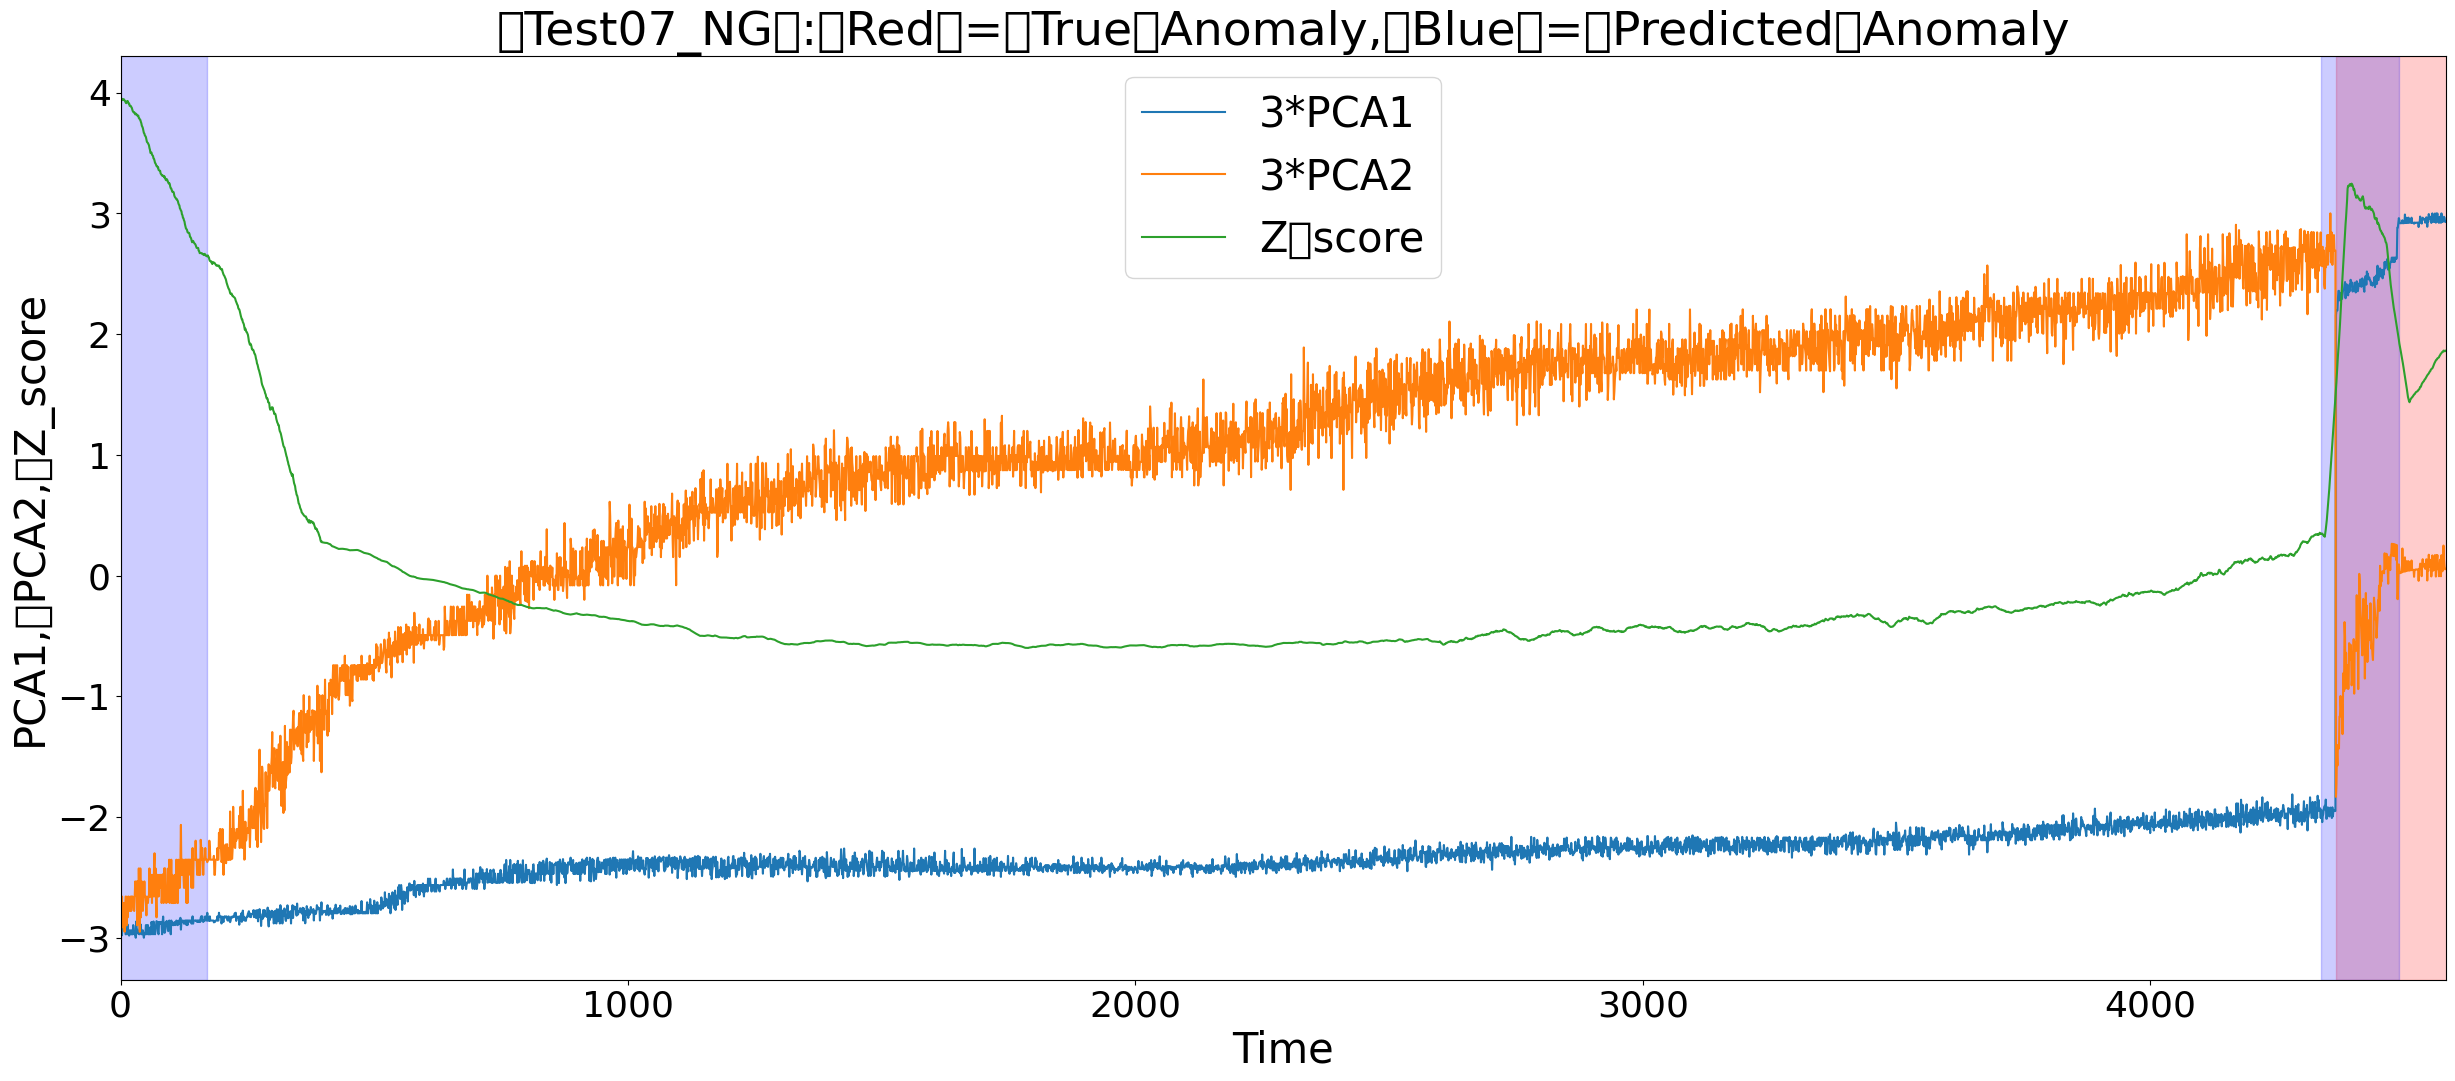

In [ ]:
register_matplotlib_converters()
np.random.seed(0)
if	not	isinstance(anomalies,	list):
  anomalies	=	[anomalies]
fig	=	plt.figure(figsize=(30,	12))
ax	=	fig.add_subplot(111)
max_len	=	length_anom-10
time	=range(max_len)
Z_score2	=	Z_score1[:max_len]
X_signal	=	[]
for	kk	in	range(max_len):
  X_signal.append(X[kk,	1])
for	kk	in	range(10):
  print(	X[kk,	1]	)
X_signal_2	=	np.array(X_signal)
plt.plot(time,	3*X_signal_2[:,	0],	label='3*PCA1')
plt.plot(time,	3*X_signal_2[:,	1],	label='3*PCA2')
plt.plot(time,	Z_score2,	label='Z	score')
plt.legend(loc=0,	fontsize=30)
print("length_anom,		max_len:",	length_anom,	max_len)
colors	=	['red']	+	['blue']	*	(len(anomalies)-1)
for	i,	anomaly	in	enumerate(anomalies):
  if	not	isinstance(anomaly,	list):
    anomaly	=	list(anomaly[['start',	'end']].itertuples(index=False))
  for	_,	anom	in	enumerate(anomaly):
    t1	=	anom[0]
    t2	=	anom[1]
    plt.axvspan(t1,	t2,	color=colors[i],	alpha=0.2)
plt.title('	Test07_NG	:	Red	=	True	Anomaly,	Blue	=	Predicted	Anomaly',	size=34)
plt.ylabel('PCA1,	PCA2,	Z_score',	size=30)
plt.xlabel('Time',	size=30)
plt.xticks(size=26)
plt.yticks(size=26)
plt.xlim([time[0],	time[-1]])
plt.show()

# 확장

## 미리 전처리 파일 만들기, -> preprocessed 에 저장하기

1️⃣ 한번에 돌리기 전 간단 진단

In [ ]:
# ① 원본 파일 몇 개인지
raw_files = glob.glob(os.path.join(raw_dir, '*_chg.csv'))
print('raw files:', len(raw_files))

# ② removeConstant/handleMissingValue 작동 여부
sample = pd.read_csv(raw_files[0])
print('before:', sample.shape)
sample2 = handleMissingValue(removeConstant(sample, 1))
print('after:',  sample2.shape)


NameError: name 'raw_dir' is not defined

In [ ]:
import os, glob, pandas as pd

raw_dir  = './data/raw_data/train'
prep_dir = './data/preprocessed/train'
os.makedirs(prep_dir, exist_ok=True)

for src in glob.glob(os.path.join(raw_dir, '*_chg.csv')):
    base = os.path.basename(src)
    dst  = os.path.join(prep_dir, base)

    if os.path.exists(dst):
        continue  # 이미 만들어둔 건 건너뜀

    df_raw = pd.read_csv(src)

    ### --- 여기서 removeConstant / handleMissingValue 등
    ###     이전에 했던 전처리 함수 호출 ---------------
    df1 = removeConstant(df_raw, 1)
    df1 = handleMissingValue(df1)

    # voltage + temperature 컬럼만 추출
    cols = df1.columns[18:226]      # 기존 인덱스 규칙 그대로
    df_train = df1[cols]

    df_train.to_csv(dst, index=False)
    print('✅ saved:', dst)


In [ ]:
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
import tensorflow as tf

class RandomWeightedAverage(Layer):
    """
    가변 배치-사이즈 지원 WGAN-GP 보간 레이어
    """
    def call(self, inputs, **kwargs):
        # 현재 배치 크기를 런타임에서 가져옴
        batch = tf.shape(inputs[0])[0]          # ⚠️ 정수 아님 → 텐서
        alpha = K.random_uniform((batch, 1, 1)) # (B,1,1)
        return alpha * inputs[0] + (1. - alpha) * inputs[1]


In [ ]:
def train_mtadgan(X_train,
                  epochs=10, batch_size=32,
                  n_critics=2, latent_dim=20):

    # 전역 모델 / 옵티마이저 가져오기
    global encoder, generator, critic_x, critic_z
    global critic_x_model, critic_z_model, encoder_generator_model
    global optimizer_cx, optimizer_cz, optimizer_gen

    fake  =  np.ones((batch_size,1), dtype=np.float32)
    valid = -np.ones((batch_size,1), dtype=np.float32)
    delta =  np.ones((batch_size,1), dtype=np.float32)

    for epoch in range(1, epochs+1):
        idx      = np.random.permutation(len(X_train))   # 셔플
        mb_total = len(idx) // (batch_size * n_critics)

        cx_loss_hist, cz_loss_hist, g_loss_hist = [], [], []

        for i in range(mb_total):
            sel = idx[i*batch_size*n_critics : (i+1)*batch_size*n_critics]
            minibatch = X_train[sel]

            # ---- critics 학습 ----
            critic_x.trainable = critic_z.trainable = True
            generator.trainable = encoder.trainable = False

            for j in range(n_critics):
                x_mb = minibatch[j*batch_size:(j+1)*batch_size]
                z_mb = np.random.normal(size=(batch_size, latent_dim, 1))
                cx_loss_hist.append(
                    critic_x_train_on_batch(x_mb, z_mb,
                                            valid, fake, delta, optimizer_cx))
                cz_loss_hist.append(
                    critic_z_train_on_batch(x_mb, z_mb,
                                            valid, fake, delta, optimizer_cz))

            # ---- encoder & generator 학습 ----
            critic_x.trainable = critic_z.trainable = False
            generator.trainable = encoder.trainable = True

            g_loss_hist.append(
                enc_gen_train_on_batch(x_mb, z_mb,
                                       valid, optimizer_gen))

        print(f'Epoch {epoch}/{epochs} | '
              f'Dx {np.mean(cx_loss_hist):.3f} | '
              f'Dz {np.mean(cz_loss_hist):.3f} | '
              f'G  {np.mean(g_loss_hist):.3f}')

    # 가중치 저장
    ckpt_dir = os.path.join(os.getcwd(), 'checkpoints')
    os.makedirs(ckpt_dir, exist_ok=True)
    critic_x_model.save_weights(os.path.join(ckpt_dir,'critic_x.weights.h5'))
    critic_z_model.save_weights(os.path.join(ckpt_dir,'critic_z.weights.h5'))
    encoder_generator_model.save_weights(
        os.path.join(ckpt_dir,'enc_gen.weights.h5'))


In [ ]:
# =========================================================
# 0) 필요한 함수·모델 정의가 이미 메모리에 있다고 가정
#    diff_smooth_df, rolling_window_sequences, predict,
#    Anomaly, train_mtadgan 등
# =========================================================
import os, glob, math, numpy as np, pandas as pd
from tqdm import tqdm
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# ---------- 하이퍼파라미터 ----------
WIN_SIZE, FEAT_DIM = 10, 3        # window 길이 / PCA 차원
EPOCHS, BATCH_SIZE, N_CRITICS = 10, 32, 2

# ---------- 1. 학습 데이터 로드 ----------
train_dir = './data/preprocessed/train'
train_files = sorted(glob.glob(os.path.join(train_dir, '*_chg.csv')))
print(f'✔️ 학습 CSV {len(train_files)}개')

df_train = pd.concat([pd.read_csv(f) for f in train_files],
                     ignore_index=True)

# ---------- 2. 전처리 (diff→NaN-Impute→PCA→Scale) ----------
df_proc = diff_smooth_df(df_train, lags_n=0, diffs_n=0, smooth_n=0)
df_proc = df_proc.dropna(axis=1, how='all')          # 열 전체 NaN 제거

imputer = SimpleImputer(strategy='mean').fit(df_proc)
X_imp   = imputer.transform(df_proc)

pca     = PCA(n_components=FEAT_DIM).fit(X_imp)
X_pca   = pca.transform(X_imp)

scaler  = MinMaxScaler(feature_range=(-1, 1)).fit(X_pca)
X_norm  = scaler.transform(X_pca)

In [ ]:
# --- 하이퍼파라미터 ---
latent_dim = 20

# (1) Encoder / Generator
# ---------------------------------------------
# 1) 모델 재빌드
# ---------------------------------------------
encoder   = build_encoder_layer(
              input_shape = [WIN_SIZE, FEAT_DIM],
              encoder_reshape_shape = [LATENT_DIM, 1])
generator = build_generator_layer(
              input_shape = [LATENT_DIM, 1],
              generator_reshape_shape = [WIN_SIZE, 1])
critic_x  = build_critic_x_layer(
              input_shape = [WIN_SIZE, FEAT_DIM])
critic_z  = build_critic_z_layer(
              input_shape = [LATENT_DIM, 1])

# 2) 보간 레이어 (배치 크기와 무관한 버전) ----------------
class RandomWeightedAverage(tf.keras.layers.Layer):
    def call(self, inputs, **kwargs):
        alpha = tf.random.uniform(
                  shape=(tf.shape(inputs[0])[0], 1, 1), dtype=inputs[0].dtype)
        return alpha * inputs[0] + (1. - alpha) * inputs[1]

# 3) 통합 모델 다시 엮기 (critic_x_model / critic_z_model / enc_gen_model)
#    ─ 생략 : 기존 로직 그대로 ─

# ---------------------------------------------
# 4) Optimizer를 **새로** 만든다
# ---------------------------------------------
LR = 5e-4
optimizer_cx  = tf.keras.optimizers.Adam(LR, beta_1=0.5, beta_2=0.9)
optimizer_cz  = tf.keras.optimizers.Adam(LR, beta_1=0.5, beta_2=0.9)
optimizer_gen = tf.keras.optimizers.Adam(LR, beta_1=0.5, beta_2=0.9)


# (2) Critic_x / Critic_z (여기서 RandomWeightedAverage가 새로 포함됨)
critic_x  = build_critic_x_layer(input_shape=critic_x_input_shape)
critic_z  = build_critic_z_layer(input_shape=critic_z_input_shape)

# ------------------ WGAN-GP 아키텍처 조립 ------------------
# inputs
z = tf.keras.Input(shape=(latent_dim, 1))
x = tf.keras.Input(shape=encoder_input_shape)

# forward
x_      = generator(z)
z_      = encoder(x)
valid_x = critic_x(x)
fake_x  = critic_x(x_)
interp  = RandomWeightedAverage()( [x, x_] )

critic_x_model = tf.keras.Model([x, z], [valid_x, fake_x, interp])

valid_z = critic_z(z)
fake_z  = critic_z(z_)
interp_z= RandomWeightedAverage()([z, z_])

critic_z_model = tf.keras.Model([x, z], [valid_z, fake_z, interp_z])

# enc-gen 합성 모델
x_gen_rec = generator(z_)
fake_gen_x= critic_x(x_)
fake_gen_z= critic_z(z_)

encoder_generator_model = tf.keras.Model([x, z],
                                         [fake_gen_x, fake_gen_z, x_gen_rec])


4) 옵티마이저 재정의

In [ ]:
lr = 5e-4
optimizer_cx  = tf.keras.optimizers.Adam(lr)
optimizer_cz  = tf.keras.optimizers.Adam(lr)
optimizer_gen = tf.keras.optimizers.Adam(lr)


5) 이제 train_mtadgan() 호출

모델생성

4) 학습 루프 (간단-Eager 버전)

In [ ]:
# ======================================================================
# 0) 라이브러리 & 기본 함수
# ======================================================================
import os, glob, math, numpy as np, pandas as pd, tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
tf.keras.backend.clear_session()               # 세션 초기화(중복 변수 제거)

# ――― 가변-배치 Interpolation 레이어 ―――
class RandomWeightedAverage(tf.keras.layers.Layer):
    def call(self, inputs, **kwargs):
        alpha = tf.random.uniform((tf.shape(inputs[0])[0], 1, 1), dtype=inputs[0].dtype)
        return alpha * inputs[0] + (1. - alpha) * inputs[1]

# ======================================================================
# 1) 데이터 전처리 (train ↔ test 동일 방식)
# ======================================================================
def load_and_preprocess(csv_list, win_size=10, feat_dim=3,
                        imputer=None, pca=None, scaler=None, fit=False):
    df      = pd.concat([pd.read_csv(f) for f in csv_list], ignore_index=True)
    df      = diff_smooth_df(df, 0, 0, 0).dropna(axis=1, how='all')

    # --- fit 또는 transform ---
    if fit:
        imputer = SimpleImputer(strategy='mean').fit(df)
        X_imp   = imputer.transform(df)
        pca     = PCA(n_components=feat_dim).fit(X_imp)
        X_pca   = pca.transform(X_imp)
        scaler  = MinMaxScaler((-1, 1)).fit(X_pca)
    else:
        X_imp   = imputer.transform(df)
        X_pca   = pca.transform(X_imp)

    X_norm = scaler.transform(X_pca)
    X_win, _, idx, _ = rolling_window_sequences(
        X_norm, np.arange(len(X_norm)),
        window_size=win_size, target_size=1,
        step_size=1, target_column=0)
    X_win = X_win.astype('float32')        # (N, win, feat)
    return X_win, idx, imputer, pca, scaler

# ======================================================================
# 2) MTadGAN 모델 빌드
# ======================================================================
def build_mtadgan(win_size=10, feat_dim=3, latent_dim=20, lr=5e-4):
    # ----- 서브 네트워크 -----
    enc  = build_encoder_layer([win_size, feat_dim], [latent_dim, 1])
    gen  = build_generator_layer([latent_dim, 1],   [win_size, 1])
    cx   = build_critic_x_layer([win_size, feat_dim])
    cz   = build_critic_z_layer([latent_dim, 1])

    # ----- WGAN-GP Wrapper -----
    z = tf.keras.Input((latent_dim, 1))
    x = tf.keras.Input((win_size,  feat_dim))

    x_fake = gen(z)
    z_fake = enc(x)

    interp_x = RandomWeightedAverage()([x, x_fake])
    interp_z = RandomWeightedAverage()([z, z_fake])

    cx_model = tf.keras.Model([x, z], [cx(x), cx(x_fake), cx(interp_x)])
    cz_model = tf.keras.Model([x, z], [cz(z), cz(z_fake), cz(interp_z)])
    eg_model = tf.keras.Model([x, z],
                              [cx(x_fake), cz(z_fake), gen(z_fake)])

    # ----- Optimizer (새로 생성) -----
    opt_cx  = tf.keras.optimizers.Adam(lr, 0.5, 0.9)
    opt_cz  = tf.keras.optimizers.Adam(lr, 0.5, 0.9)
    opt_gen = tf.keras.optimizers.Adam(lr, 0.5, 0.9)

    return enc, gen, cx, cz, cx_model, cz_model, eg_model, opt_cx, opt_cz, opt_gen

# ======================================================================
# 3) 학습 루프 (Eager / 간단 WGAN-GP)
# ======================================================================
@tf.function
def cx_step(x, z, real, fake, delta,
            cx_model, opt_cx, wasserstein_loss):
    with tf.GradientTape() as tape:
        real_x, fake_x, interp = cx_model([x, z], training=True)
        grad_penalty = gradient_penalty(cx_model, interp)
        loss = (wasserstein_loss(real, real_x) +
                wasserstein_loss(fake, fake_x) + 10. * grad_penalty)
    grads = tape.gradient(loss, cx_model.trainable_weights)
    opt_cx.apply_gradients(zip(grads, cx_model.trainable_weights))
    return loss

@tf.function
def cz_step(x, z, real, fake, delta,
            cz_model, opt_cz, wasserstein_loss):
    with tf.GradientTape() as tape:
        real_z, fake_z, interp = cz_model([x, z], training=True)
        grad_penalty = gradient_penalty(cz_model, interp)
        loss = (wasserstein_loss(real, real_z) +
                wasserstein_loss(fake, fake_z) + 10. * grad_penalty)
    grads = tape.gradient(loss, cz_model.trainable_weights)
    opt_cz.apply_gradients(zip(grads, cz_model.trainable_weights))
    return loss

@tf.function
def gen_step(x, z, real,
             eg_model, opt_gen, wasserstein_loss):
    with tf.GradientTape() as tape:
        fake_x, fake_z, x_rec = eg_model([x, z], training=True)
        loss = (wasserstein_loss(real, fake_x) +
                wasserstein_loss(real, fake_z) +
                tf.keras.losses.MSE(tf.reshape(x, (-1,)), tf.reshape(x_rec, (-1,))) * 10.)
    grads = tape.gradient(loss, eg_model.trainable_weights)
    opt_gen.apply_gradients(zip(grads, eg_model.trainable_weights))
    return loss

def gradient_penalty(model, interp):
    with tf.GradientTape() as gp_tape:
        gp_tape.watch(interp)
        pred = model.layers[-3](interp)  # 마지막 Conv/Dense 앞 출력
    grads = gp_tape.gradient(pred, interp)
    grads = tf.reshape(grads, (tf.shape(grads)[0], -1))
    norm  = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=1) + 1e-8)
    return tf.reduce_mean((norm - 1.)**2)

def train_mtadgan(X_train, epochs, batch_size,
                  n_critics, latent_dim,
                  cx_model, cz_model, eg_model,
                  opt_cx, opt_cz, opt_gen):
    wasserstein = lambda y_true, y_pred: tf.reduce_mean(y_true * y_pred)
    real  = -tf.ones((batch_size, 1))
    fake  =  tf.ones((batch_size, 1))
    delta =  tf.ones((batch_size, 1))         # GP용 placeholder

    dataset = (tf.data.Dataset.from_tensor_slices(X_train)
               .shuffle(len(X_train)).batch(batch_size, drop_remainder=True))

    for epoch in range(1, epochs+1):
        cx_hist, cz_hist, g_hist = [], [], []
        for step, x_batch in enumerate(dataset):
            for _ in range(n_critics):
                z_batch = tf.random.normal((batch_size, latent_dim, 1))
                cx_hist.append(cx_step(x_batch, z_batch, real, fake, delta,
                                       cx_model, opt_cx, wasserstein))
                cz_hist.append(cz_step(x_batch, z_batch, real, fake, delta,
                                       cz_model, opt_cz, wasserstein))
            z_batch = tf.random.normal((batch_size, latent_dim, 1))
            g_hist.append(gen_step(x_batch, z_batch, real,
                                   eg_model, opt_gen, wasserstein))
        print(f'Epoch {epoch} | '
              f'Dx {tf.reduce_mean(cx_hist):.3f} | '
              f'Dz {tf.reduce_mean(cz_hist):.3f} | '
              f'G  {tf.reduce_mean(g_hist):.3f}')

# ======================================================================
# 4) 전체 파이프라인 실행
# ======================================================================
RAW_DIR  = './data/raw_data/train'
PREP_DIR = './data/preprocessed/train'
os.makedirs(PREP_DIR, exist_ok=True)

# (A) 전처리 파일 존재 확인 & 생성
raw_files = glob.glob(os.path.join(RAW_DIR, '*_chg.csv'))
if not glob.glob(os.path.join(PREP_DIR, '*_chg.csv')):
    for src in raw_files:
        base = os.path.basename(src)
        dst  = os.path.join(PREP_DIR, base)
        df   = handleMissingValue(removeConstant(pd.read_csv(src), 1))
        df[df.columns[18:226]].to_csv(dst, index=False)

# (B) 학습 데이터 로드 & fit
train_files = sorted(glob.glob(os.path.join(PREP_DIR, '*_chg.csv')))
X_train, _, imputer, pca, scaler = load_and_preprocess(
        train_files, win_size=10, feat_dim=3, fit=True)

# (C) MTadGAN 모델 빌드
(enc, gen, cx, cz,
 cx_model, cz_model, eg_model,
 opt_cx, opt_cz, opt_gen) = build_mtadgan(win_size=10, feat_dim=3)

# (D) 학습 (방식 단순화)
train_mtadgan(X_train, epochs=10, batch_size=32, n_critics=2, latent_dim=20,
              cx_model=cx_model, cz_model=cz_model, eg_model=eg_model,
              opt_cx=opt_cx, opt_cz=opt_cz, opt_gen=opt_gen)

# (E) 테스트 루프 (전처리 → 예측 → 점수 → 메트릭)
test_dir = './data/preprocessed/test'
sig_files = sorted(glob.glob(os.path.join(test_dir, 'Test*_dchg.csv')))
lbl_map   = {os.path.basename(f).replace('_Label','').replace('.csv',''): f
             for f in glob.glob(os.path.join(test_dir, 'Test*_Label.csv'))}

records = []
for sig in tqdm(sig_files):
    key = os.path.basename(sig).replace('.csv','')
    lbl = lbl_map.get(key)
    if not lbl:
        print(f'⚠️ 라벨 없음 → skip: {key}'); continue

    X_test, idx_test, *_ = load_and_preprocess(
            [sig], win_size=10, feat_dim=3,
            imputer=imputer, pca=pca, scaler=scaler, fit=False)

    y_hat, critic = predict(X_test)
    scores, _, _, _ = Anomaly().score_anomalies(
            X_test, y_hat, critic, idx_test, comb='mult')

    thr = np.mean(scores)+3*np.std(scores)
    pred = (scores > thr).astype(int)
    gt   = pd.read_csv(lbl)['label'].values[:len(pred)]

    tp = np.sum((pred==1)&(gt==1)); fp = np.sum((pred==1)&(gt==0))
    fn = np.sum((pred==0)&(gt==1)); tn = np.sum((pred==0)&(gt==0))

    prec = tp/(tp+fp+1e-8); rec = tp/(tp+fn+1e-8)
    f1   = 2*prec*rec/(prec+rec+1e-8); acc = (tp+tn)/len(gt)

    records.append({'file':key,'Accuracy':acc,'Precision':prec,
                    'Recall':rec,'F1':f1,'thr':thr})

df_res = pd.DataFrame(records)
print("\n📊 최종 결과\n", df_res.round(4))
